In [1]:
import pickle

import matplotlib
matplotlib.use('Agg')
import os
import datetime
import numpy as np
#import dill as pickle
import random
import sys
np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
#print(os.getcwd())
#from codes.experimentclasses.RigidEthanolPCA2 import RigidEthanolPCA2
from codes.experimentclasses.MalonaldehydeAngles import MalonaldehydeAngles
from codes.otherfunctions.multirun import get_coeffs_reps_tangent
from codes.otherfunctions.multirun import get_grads_reps_pca2_tangent
from codes.otherfunctions.multiplot import plot_reg_path_ax_lambdasearch_tangent
from codes.otherfunctions.get_dictionaries import get_atoms_4
from codes.flasso.Replicate import Replicate
from codes.otherfunctions.get_grads_tangent import get_grads_tangent
from codes.otherfunctions.multirun import get_support_recovery_lambda
from codes.otherfunctions.multirun import get_lower_interesting_lambda
import matplotlib.pyplot as plt
from codes.otherfunctions.multirun import get_coeffs_and_lambdas
from codes.geometer.RiemannianManifold import RiemannianManifold
from collections import Counter
from einops import rearrange

/Users/samsonkoelle/manifoldflasso_jmlr


In [2]:
#import pickle

In [3]:
#import pickle

In [4]:
help(pickle)

Help on module pickle:

NAME
    pickle - Create portable serialized representations of Python objects.

MODULE REFERENCE
    https://docs.python.org/3.5/library/pickle
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    See module copyreg for a mechanism for registering custom picklers.
    See module pickletools source for extensive comments.
    
    Classes:
    
        Pickler
        Unpickler
    
    Functions:
    
        dump(object, file)
        dumps(object) -> string
        load(file) -> object
        loads(string) -> object
    
    Misc variables:
    
        __version__
        format_version
        compatible_formats

CLASSES
    builtins.Exception(builtins.BaseException)
     

In [5]:
nreps= 25
dim = 2
#from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

with open('/Users/samsonkoelle/Downloads/malonaldehyde_120520results.pkl' ,
         'rb') as loader:
     results = pickle.load(loader)


        


In [12]:
replicates

{0: <__main__.Replicate at 0x128c8aa90>,
 1: <__main__.Replicate at 0x128c8abe0>,
 2: <__main__.Replicate at 0x128c8ac18>,
 3: <__main__.Replicate at 0x128c8ac50>,
 4: <__main__.Replicate at 0x128c8ac88>}

In [ ]:
import dill as pickle

In [13]:
# import pickle
# help(pickle)

In [14]:
# import sys
# #!{sys.executable} -m pip install dill --upgrade
# !{sys.executable} -m pip install dill --upgrade

In [15]:
# import matplotlib
# matplotlib.use('Agg')
# import os
# import datetime
# import numpy as np
# import dill as pickle
# import random
# import sys
# import seaborn as sns
# import matplotlib
# matplotlib.use('Agg')
# import matplotlib.pyplot as plt
# from matplotlib import rcParams
# from collections import OrderedDict
# import math
# from matplotlib.lines import Line2D
# from pylab import rcParams
# from collections import Counter
# from itertools import combinations
# #from datetime import datetime

# from shutil import copyfile
# rcParams['figure.figsize'] = 25, 10

# np.random.seed(0)
# random.seed(0)
# now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
# workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
# sys.path.append(workingdirectory)
# os.chdir(workingdirectory)
# from codes.experimentclasses.RigidEthanolPCA2 import RigidEthanolPCA2
# from codes.otherfunctions.get_dictionaries import get_all_atoms_4
# from codes.otherfunctions.get_grads import get_grads
# from codes.otherfunctions.multirun import get_support_recovery_lambda
# from codes.otherfunctions.multirun import get_lower_interesting_lambda
# from codes.otherfunctions.multirun import get_coeffs_and_lambdas
# from codes.otherfunctions.multirun import get_support
# from codes.otherfunctions.multiplot import plot_support_2d
# from codes.otherfunctions.multiplot import plot_reg_path_ax_lambdasearch
# from codes.otherfunctions.multiplot import plot_gs_v_dgnorm
# from codes.otherfunctions.multiplot import plot_dot_distributions
# from codes.otherfunctions.multirun import get_cosines
# from codes.flasso.Replicate import Replicate
# from codes.otherfunctions.multirun import get_olsnorm_and_supportsbrute
# from codes.otherfunctions.multiplot import highlight_cell



In [16]:
# with open('/homes/sjkoelle/manifoldflasso_jmlr/untracked_data/embeddings/rigidethanol/malonaldehyde_120520replicates_small.pkl' ,
#          'rb') as loader:
#      replicates = pickle.load(loader)

In [3]:
class Replicate():
    
    def __init__(self):
        2+2

In [4]:
nreps = 5
#results  = results_rigidethanol
replicates = {}
for r in range(5):
    print(r)
    replicates[r] = Replicate()
    cs = rearrange(np.asarray(list(results[r][1].values())), 'l n p m -> l m n p')
    xaxis = np.asarray(list(results[r][1].keys()))
    cs_reorder = cs[xaxis.argsort()]
    xaxis_reorder = xaxis[xaxis.argsort()]
    replicates[r].cs_order = cs_reorder
    replicates[r].xaxis_reorder = xaxis_reorder

0
1
2
3
4


In [5]:
def get_support(coeffs, dim):
    selected_functions = np.asarray(np.where(np.sum(np.sum(coeffs ** 2, axis=1), axis=1) > 0))

    if len(np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0]) > 0:
        selection_lambda = np.min(np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0])

        selected_functions_at_selection_lambda = selected_functions[1][np.where(selected_functions[0] == selection_lambda)[0]]
    
        return(selected_functions_at_selection_lambda)
    else:
        return(np.asarray([]))

def get_toplot(supports,p,d):
    to_plot = np.zeros(np.repeat(p,d))
    support_indices = np.asarray(list(supports.values()))
    
    for i in range(len(support_indices)):
        if type(support_indices[i]) == np.ndarray:
            if len(support_indices[i]) > 0:
                #print(tuple(support_indices[i]), to_plot[tuple(support_indices[i])])#, print(to_plot[-1])
                to_plot[tuple(support_indices[i])] += 1

    return(to_plot)
nreps = 5
supports_rigidethanol = {}
for i in range(nreps):
    print(i)
    supports_rigidethanol[i] = get_support(replicates[i].cs_order, dim = 2)

toplot_rigidethanol = get_toplot(supports_rigidethanol, 756,2)

0
1
2
3
4


In [6]:
#atoms4[np.where((np.linalg.norm(GGL1.fit_[-1]['beta'], axis = 0)**2).sum(axis = 1) != 0.)[0]]

In [7]:
np.asarray(list(supports_rigidethanol.values()))

array([[732, 738],
       [715, 732],
       [691, 732],
       [709, 732],
       [709, 738]])

In [17]:
from codes.otherfunctions.get_dictionaries import get_all_atoms_4
atoms4 = get_all_atoms_4(9)[0]

In [9]:
atoms4[732]

array([4, 5, 6, 8])

In [11]:
atoms4[738]

array([4, 5, 7, 8])

In [12]:
from shutil import copyfile

In [13]:
from codes.experimentclasses.MalonaldehydeAngles import MalonaldehydeAngles

In [14]:

#set parameters
n = 50000
#n = 10000 #number of data points to simulate
nsel = 100 #number of points to analyze with lasso
#itermax = 1000 #maximum iterations per lasso run
#tol = 1e-10 #convergence criteria for lasso
#lambdas = np.asarray([0,.01,.1,1,10,100], dtype = np.float16)#lambda values for lasso
#lambdas = np.asarray(np.hstack([np.asarray([0]),np.logspace(-3,1,11)]), dtype = np.float16)
n_neighbors = 1000 #number of neighbors in megaman
m = 3 #number of embedding dimensions (diffusion maps)
#diffusion_time = 1. #diffusion time controls gaussian kernel radius per gradients paper
diffusion_time = 1. #(yuchia suggestion)
dim = 2 #manifold dimension
dimnoise = 2
natoms = 9
cores = 3 #number of cores for parallel processing
cor = 0.0 #correlation for noise
var = 0.00001 #variance scaler for noise
ii = np.asarray([0, 0, 0, 1, 1, 1, 2, 2])
jj = np.asarray([4, 5, 1, 6, 7, 2, 3, 8])
#run experiment
#these are just for loading... probably not necessary
atoms4 = np.asarray([[4,0,1,2],[0,1,2,3],[3,2,1,8],[4,0,1,5]],dtype = int)
nreps = 25
lambda_max = 1
max_search = 30

folder = workingdirectory + '/Figures/malonaldehyde/' + now + 'n' + str(n) + 'nsel' + str(nsel) + 'nreps' + str(nreps)
#os.mkdir(folder)

#src = workingdirectory + '/codes/experiments/malonaldehyde_110120_nsel100_nreps25.py'
#filenamescript = folder + '/script.py'
#copyfile(src, filenamescript)

new_MN = True
new_grad = True
savename = 'malonaldehyde_110120'
savefolder = 'malonaldehyde'
loadfolder = 'malonaldehyde'
loadname = 'malonaldehyde_110120'
data_wd = '/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/'
if new_MN == True:
    experiment = MalonaldehydeAngles(dim, ii, jj,cores,atoms4)
    projector  = np.load(data_wd + '/untracked_data/chemistry_data/malonaldehydeangles022119_pca50_components.npy')
    experiment.M = experiment.load_data(data_wd)  # if noise == False then noise parameters are overriden
    experiment.Mpca = RiemannianManifold(np.load(data_wd + '/untracked_data/chemistry_data/malonaldehydeangles022119_pca50.npy'), dim)
    experiment.q = m
    experiment.m = m
    experiment.dimnoise = dimnoise
    experiment.projector = projector
    experiment.Mpca.geom = experiment.Mpca.compute_geom(diffusion_time, n_neighbors)
    experiment.N = experiment.Mpca.get_embedding3(experiment.Mpca.geom, m, diffusion_time, dim)


In [15]:
g1fast =  experiment.get_g_full_sub(experiment.M.data, np.asarray([4, 5, 7, 8]))
g2fast = experiment.get_g_full_sub(experiment.M.data, np.asarray([4, 5, 6, 8]))#np.asarray([6, 4, 7, 8]))#np.asarray([2, 0, 6, 7]))

<IPython.core.display.Javascript object>


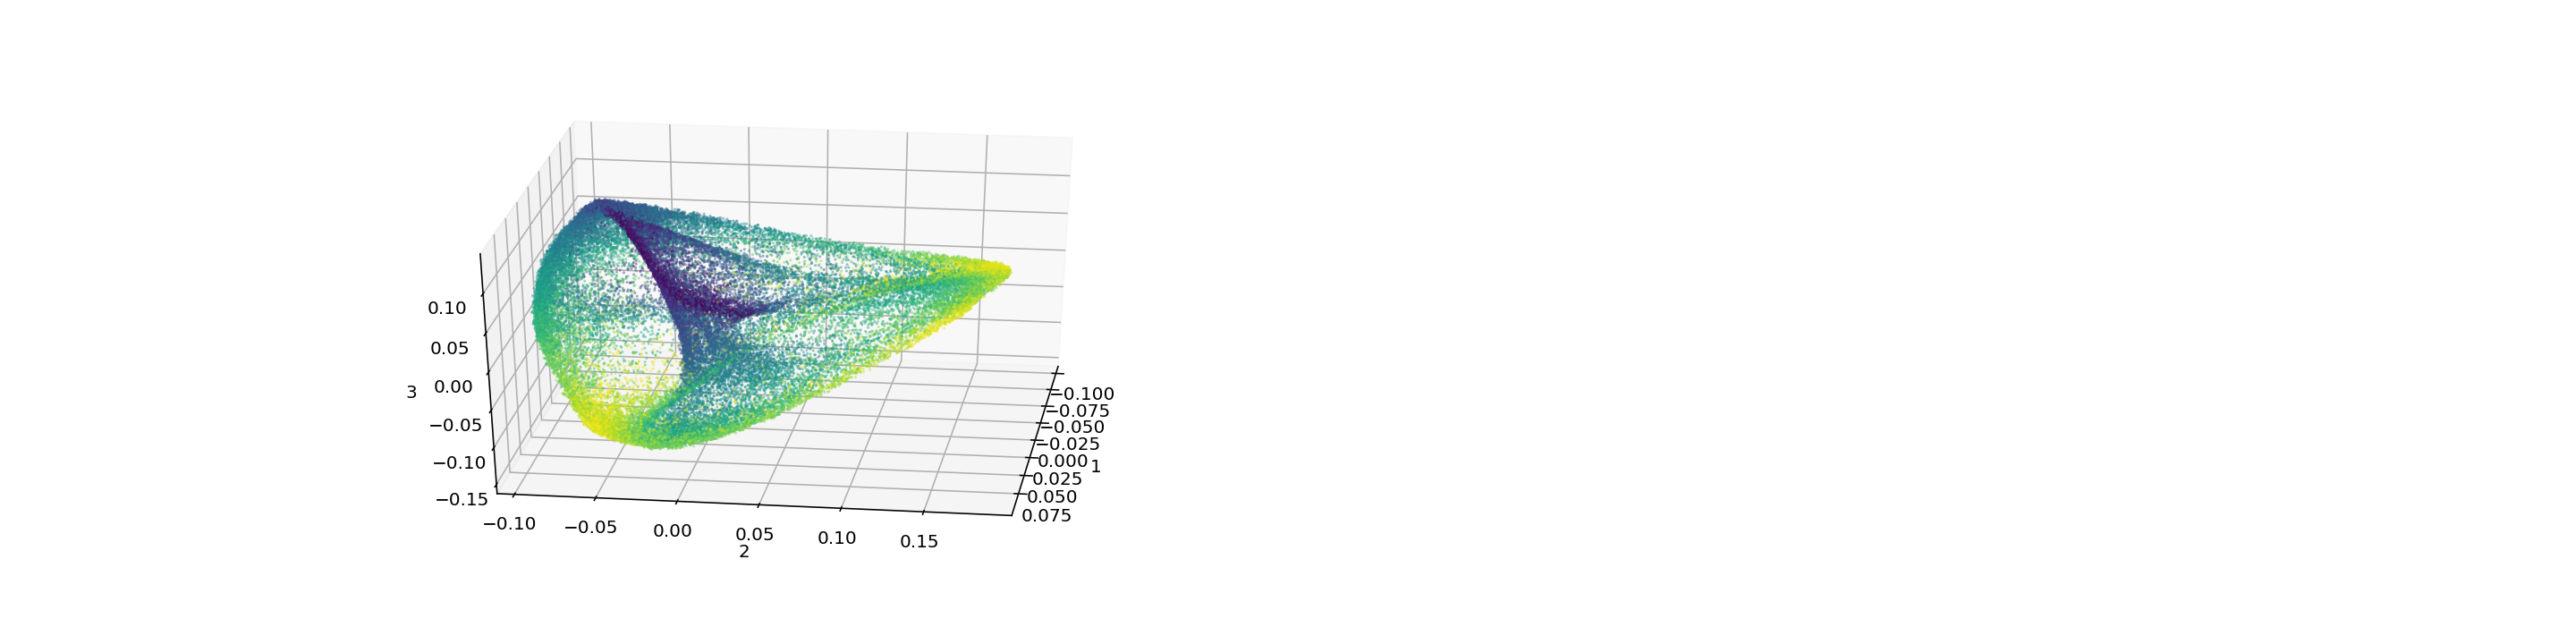

Text(0.5, 0, '3')

In [31]:
%matplotlib notebook
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

fig, axs = plt.subplots(2,1, figsize = (20,5))
data = experiment.N.data
axes = [0,1,2]
s = 1
alpha = .5

axs[0].set_axis_off()
axs[1].set_axis_off()

ax = fig.add_subplot(1, 2, 1, projection='3d')

selected_points = list(range(50000))
x = data[:, 0][selected_points]
y = data[:, 1][selected_points]
z = data[:, 2][selected_points]
#fig = plt.figure(figsize=(15,10))
#ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(x, y, z, c=g1fast, s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
ax.set_xlabel('1')
ax.set_ylabel('2')
ax.set_zlabel('3')

In [32]:
results[:5]

[(0.07475070529464667, {0.0: array([[[ 0.00028843, -0.0112519 ,  0.00612484],
           [-0.0002749 ,  0.01046998, -0.00577555],
           [-0.00020913,  0.008423  , -0.00450315],
           ...,
           [-0.0002927 ,  0.0109925 , -0.00610417],
           [-0.00014534,  0.00590283, -0.00314672],
           [ 0.00031165, -0.01185816,  0.00655029]],
   
          [[ 0.00681628, -0.00070015,  0.00896947],
           [-0.00468077,  0.00047264, -0.00628141],
           [ 0.0055384 , -0.00055568,  0.00751069],
           ...,
           [-0.00533942,  0.00053659, -0.00723412],
           [ 0.00448405, -0.00044127,  0.00623197],
           [ 0.00268915, -0.00026978,  0.00366333]],
   
          [[ 0.01294739, -0.00086399, -0.00435774],
           [-0.00797645,  0.00050344,  0.00278016],
           [ 0.00823488, -0.00050707, -0.00291504],
           ...,
           [-0.01167969,  0.00076521,  0.00397751],
           [ 0.01063194, -0.00071243, -0.00356452],
           [ 0.00529372, -0.0003

<IPython.core.display.Javascript object>


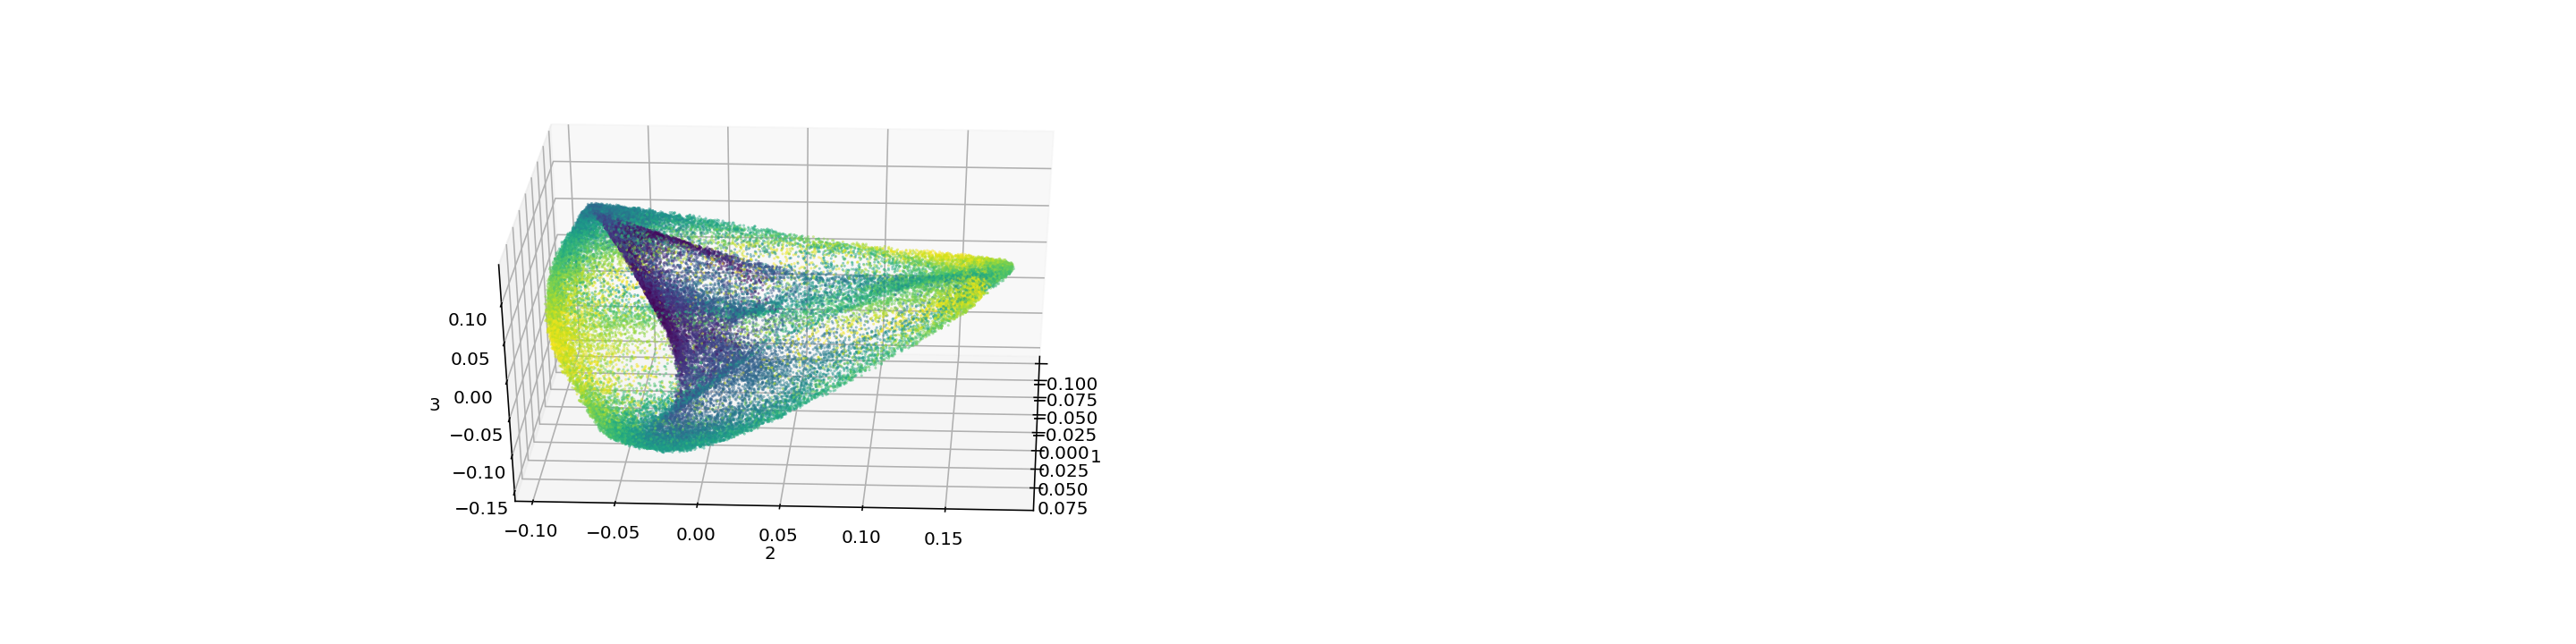

Text(0.5, 0, '3')

In [30]:
%matplotlib notebook
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

fig, axs = plt.subplots(2,1, figsize = (20,5))
data = experiment.N.data
axes = [0,1,2]
s = 1
alpha = .5

axs[0].set_axis_off()
axs[1].set_axis_off()

ax = fig.add_subplot(1, 2, 1, projection='3d')

selected_points = list(range(50000))
x = data[:, 0][selected_points]
y = data[:, 1][selected_points]
z = data[:, 2][selected_points]

#fig = plt.figure(figsize=(15,10))
#ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(x, y, z, c=g2fast, s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
ax.set_xlabel('1')
ax.set_ylabel('2')
ax.set_zlabel('3')

In [43]:

def plot_reg_path_ax_lambdasearch_customcolors_norm(ax, coeffs, xaxis,fig, colors):
    p = coeffs.shape[3]
    q = coeffs.shape[1]
    gnames = np.asarray(list(range(p)), dtype=str)

    rcParams['axes.titlesize'] = 30
    plt.rc('text', usetex=True)

    normax = np.sqrt(np.sum(np.sum(np.sum(coeffs ** 2, axis=1), axis=1), axis=1).max())

    for j in range(p):
        toplot = np.linalg.norm(np.linalg.norm(coeffs[:, :, :, j], axis=2), axis=1)
        # axes[0].boxplot(toplot, positions=xaxis, showfliers=False, vert=True, widths=widths,medianprops=dict(linestyle=''))
        ax.plot(xaxis, toplot, 'go--', linewidth=5, markersize=0, alpha=1.,
                     color=colors[j], label=gnames[j])

    kkk = xaxis.copy()
    kkk.sort()

    # xupperindex = np.min(np.where(np.sum(np.sum(np.sum(coeffs**2, axis = 1), axis = 1), axis = 1) ==0)[0])

    #for k in range(1 + q):
    ax.tick_params(labelsize=50)
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    ax.set_ylim(bottom=0, top=normax)
    # axes[k].set_xlim(left = 0, right = xaxis[xupperindex])
    #if (k == 0):
    tixx = np.hstack(
        [np.asarray([0]), 10 ** np.linspace(math.floor(np.log10(normax)), math.floor(np.log10(normax)) + 1, 2)])
#    if k != 0:
        # axes[k].set_yticks(tixx)
    #ax.set_ylabel(r"$\displaystyle \|\hat \beta_{j}\|_2$", fontsize = 70)
    #ax.set_xlabel(r"$\lambda  \sqrt{nm}$", fontsize = 70)
    #ylabel = r"$\displaystyle \|\hat \beta_{j}\|_2$"
    #ax.l
    #if k == 0:
    #ax.set_title("Combined", fontdict={'fontsize': 50})
    ax.grid(True, which="both", alpha=True)

    #handles, labels = ax.get_legend_handles_labels()
    #by_label = OrderedDict(zip(labels, handles))
    # fig.text(0.5, 0.04, xlabel, ha='center', va='center', fontsize=50)
    # fig.text(0.05, 0.5, ylabel, ha='center', va='center', rotation='vertical', fontsize=60)
    #fig.subplots_adjust(right=0.75)
    #leg_ax = fig.add_axes([.8, 0.15, 0.05, 0.7])
    #leg_ax.axis('off')
    #leg = leg_ax.legend(by_label.values(), gnames, prop={'size': 200 / p})
    # leg.set_title('Torsion', prop={'size': Function})
    #for l in leg.get_lines():
    #    l.set_alpha(1)
    # fig.savefig(filename + 'beta_paths_n' + str(n) + 'nsel' + str(nsel) + 'nreps' + str(
    #    nreps))

In [44]:
np.asarray(list(results[0][1].values())).shape

(12, 500, 756, 3)

In [47]:
from matplotlib import rcParams
from collections import OrderedDict
import math
from matplotlib.lines import Line2D
from pylab import rcParams
from collections import Counter
from itertools import combinations

from shutil import copyfile
rcParams['figure.figsize'] = 25, 10


In [48]:
cs = rearrange(np.asarray(list(results[0][1].values())), 'l n p m -> l m n p')
xaxis = np.asarray(np.asarray(list(results[0][1].keys())))
xaxis_reorder = xaxis[xaxis.argsort()]
cs_reorder = cs[xaxis.argsort()]
xaxis_reorder = xaxis[xaxis.argsort()]
#replicates[r].cs_order = cs_reorder
#replicates[r].xaxis_reorder = xaxis_reorder

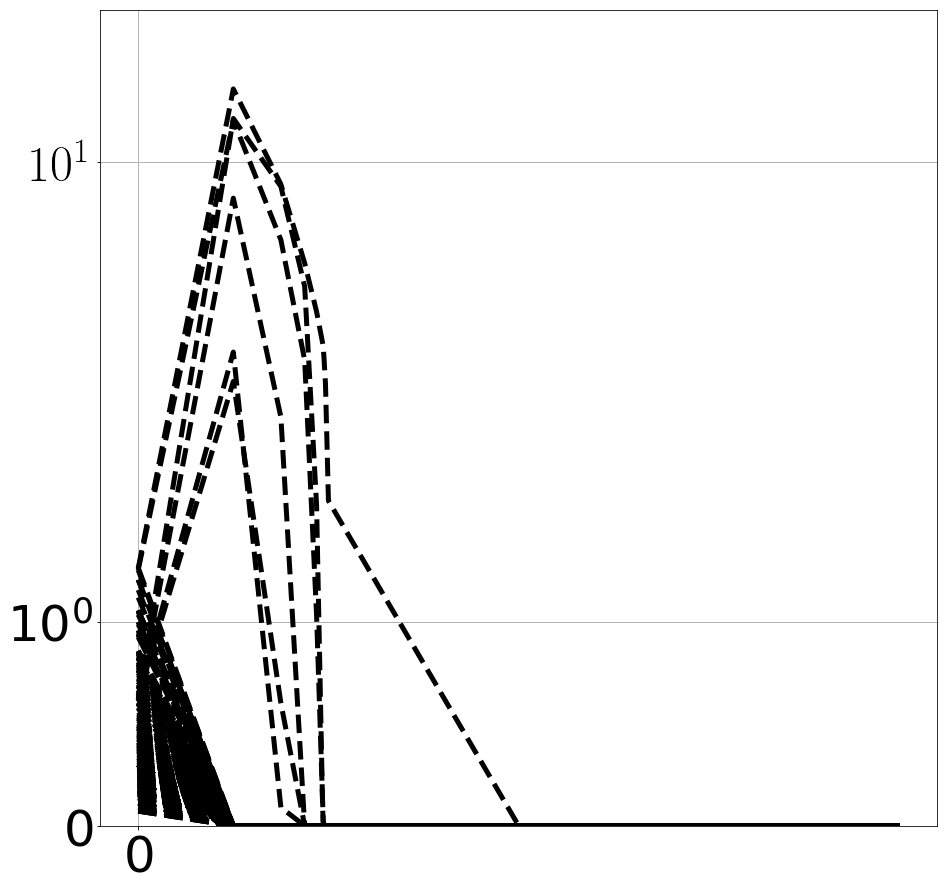

In [49]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (15,15))
colors = np.repeat('black',756)
plot_reg_path_ax_lambdasearch_customcolors_norm(ax, cs_reorder, xaxis_reorder * np.sqrt(3 * 5), fig,colors)#axes_all[0].imshow(asdf)

In [50]:
np.linalg.norm()

(12, 3, 756)

In [56]:
np.linalg.norm(np.linalg.norm(cs[:, :, :, 732], axis=2), axis=1)

array([ 1.26285923,  0.        ,  3.12394393,  1.59468806,  3.21919358,
        3.90427773,  5.29160578, 15.79315633,  8.68012031,  2.92466412,
        2.48234374,  0.        ])

In [62]:
(-np.sum(np.linalg.norm(cs[7, :, :, :], axis=1)**2, axis=0)).argsort()

array([732, 709, 738, 715, 691, 697,   0, 498, 499, 500, 501, 502, 503,
       504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 497, 496, 494,
       514, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484,
       485, 486, 487, 488, 489, 490, 491, 492, 493, 495, 515, 518, 517,
       542, 543, 544, 545, 546, 547, 548, 549, 550, 541, 551, 553, 554,
       555, 556, 557, 558, 559, 560, 561, 552, 516, 540, 538, 472, 519,
       520, 521, 522, 523, 524, 525, 526, 539, 527, 529, 530, 531, 532,
       533, 534, 535, 536, 537, 528, 471, 468, 469, 403, 404, 405, 406,
       407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419,
       420, 421, 402, 422, 401, 399, 380, 381, 382, 383, 384, 385, 386,
       387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 400,
       423, 424, 425, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459,
       460, 461, 462, 463, 464, 465, 466, 467, 562, 449, 448, 447, 446,
       426, 427, 428, 429, 430, 431, 432, 433, 434, 470, 435, 43

In [18]:
#atoms4 = np.asarray([[4,0,1,2],[0,1,2,3],[3,2,1,8],[4,0,1,5]],dtype = int)

In [19]:
atoms4[[732, 709, 738, 715, 691, 697]]

array([[4, 5, 6, 8],
       [5, 3, 6, 8],
       [4, 5, 7, 8],
       [5, 3, 7, 8],
       [4, 3, 6, 8],
       [4, 3, 7, 8]])

In [20]:
atoms4 = atoms4[[732, 709, 738, 715, 691, 697]]
p = 6

In [24]:

from codes.geometer.RiemannianManifold import RiemannianManifold
from codes.geometer.ShapeSpace import ShapeSpace
from codes.geometer.TangentBundle import TangentBundle


def get_grads(experiment, Mpca, Mangles, N, selected_points):
    dimnoise = experiment.dimnoise
    dim = experiment.dim
    cores = experiment.cores

    tangent_bases = Mpca.get_wlpca_tangent_sel(Mpca, selected_points, dimnoise)
    subM = RiemannianManifold(Mpca.data[selected_points], dim)
    subM.tb = TangentBundle(subM, tangent_bases)
    N.tangent_bundle = TangentBundle(N, np.swapaxes(N.geom.rmetric.Hvv[:,:dim,:],1,2))

    df_M = experiment.get_dF_js_idM(Mpca, N, subM.tb, N.tangent_bundle, selected_points, dimnoise)
    df_M2 = df_M / np.sum(np.linalg.norm(df_M, axis=1) ** 2, axis=0)**(0.5)
    dg_x = experiment.get_dx_g_full(Mangles.data[selected_points])

    W = ShapeSpace(experiment.positions, Mangles.data)
    dw = W.get_dw(cores, experiment.atoms3, experiment.natoms, selected_points)
    dg_w = experiment.project(np.swapaxes(dw, 1, 2),
                              experiment.project(dw, dg_x))

    dg_w_pca = np.asarray([np.matmul(experiment.projector, dg_w[j].transpose()).transpose() for j in range(len(selected_points))])
    dgw_norm = experiment.normalize(dg_w_pca)
    dg_M = experiment.project(subM.tb.tangent_bases, dgw_norm)
    return (df_M2, dg_M, dg_w, dg_w_pca, dgw_norm)



In [26]:

atoms4,p = get_all_atoms_4(natoms)
atoms4 = atoms4[[732, 709, 738, 715, 691, 697]]
p = 6
experiment.p = p
experiment.atoms4 = atoms4
#experiment.itermax = itermax
#experiment.tol = tol
experiment.dnoise = dim
experiment.nreps = nreps
experiment.nsel = nsel
experiment.folder = folder

replicates = {}
selected_points_save = np.zeros((nreps,nsel))

print('pre-gradient acquisition')
print(datetime.datetime.now())
for i in range(1):
    selected_points = np.random.choice(list(range(n)),nsel,replace = False)
    selected_points_save[i] = selected_points
    replicates[i] = Replicate()
    replicates[i].nsel = nsel
    replicates[i].selected_points = selected_points
    replicates[i].df_M,replicates[i].dg_M,replicates[i].dg_w ,replicates[i].dg_w_pca ,replicates[i].dgw_norm  = get_grads(experiment, experiment.Mpca, experiment.M, experiment.N, selected_points)
    replicates[i].dg_M = np.swapaxes(replicates[i].dg_M, 1,2)


pre-gradient acquisition
2020-12-07 12:26:27.724917


In [29]:
from codes.otherfunctions.multirun import get_cosines
cuz = get_cosines(np.swapaxes(replicates[0].dg_M, 1,2))
import seaborn as sns
%matplotlib inline
sns.heatmap(cuz)

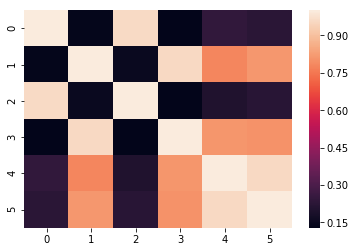

In [ ]:
atoms4[[732, 709, 738, 715, 691, 697]]

In [ ]:
array([[4, 5, 6, 8],
       [5, 3, 6, 8],
       [4, 5, 7, 8],
       [5, 3, 7, 8],
       [4, 3, 6, 8],
       [4, 3, 7, 8]])

In [ ]:
array([[732, 738],
       [715, 732],
       [691, 732],
       [709, 732],
       [709, 738]])

In [37]:
results[0][0]


0.07475070529464667

In [17]:
with open('/Users/samsonkoelle/Downloads/malonaldehyde_120520replicates_small.pkl' ,
         'rb') as loader:
     replicates_small = pickle.load(loader)

In [18]:
from codes.flasso.GradientGroupLasso import GradientGroupLasso

In [53]:
reg_l1s = [0.07475070529464667]
reg_l2 = [0.]
max_iter = 500
learning_rate = 1000.
tol = 1e-14
replicate = replicates_small[0]
GGL = GradientGroupLasso(replicate.dg_M, replicate.df_M, reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)

In [55]:
GGL.fit()

0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 2

In [56]:
np.linalg.norm(np.linalg.norm(GGL.fit_[-1]['beta'], axis=2), axis=0)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [57]:
results[1][0]

0.07204887257315343

In [58]:
reg_l1s = [0.07204887257315343]
reg_l2 = [0.]
max_iter = 500
learning_rate = 1000.
tol = 1e-14
replicate = replicates_small[0]
GGL2 = GradientGroupLasso(replicates_small[1].dg_M, replicates_small[1].df_M, reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)

In [59]:
GGL2.fit()

0
lr 1000.0
lr 500.0
lr 250.0
lr 125.0
1
lr 125.0
2
lr 125.0
3
lr 125.0
4
lr 125.0
5
lr 125.0
6
lr 125.0
7
lr 125.0
8
lr 125.0
9
lr 125.0
10
lr 125.0
11
lr 125.0
12
lr 125.0
13
lr 125.0
14
lr 125.0
15
lr 125.0
16
lr 125.0
17
lr 125.0
18
lr 125.0
19
lr 125.0
20
lr 125.0
21
lr 125.0
22
lr 125.0
23
lr 125.0
24
lr 125.0
25
lr 125.0
26
lr 125.0
27
lr 125.0
28
lr 125.0
29
lr 125.0
30
lr 125.0
31
lr 125.0
32
lr 125.0
33
lr 125.0
34
lr 125.0
35
lr 125.0
36
lr 125.0
37
lr 125.0
38
lr 125.0
39
lr 125.0
40
lr 125.0
41
lr 125.0
42
lr 125.0
43
lr 125.0
44
lr 125.0
45
lr 125.0
46
lr 125.0
47
lr 125.0
48
lr 125.0
49
lr 125.0
50
lr 125.0
51
lr 125.0
52
lr 125.0
53
lr 125.0
54
lr 125.0
55
lr 125.0
56
lr 125.0
57
lr 125.0
58
lr 125.0
59
lr 125.0
60
lr 125.0
61
lr 125.0
62
lr 125.0
63
lr 125.0
64
lr 125.0
65
lr 125.0
66
lr 125.0
67
lr 125.0
68
lr 125.0
69
lr 125.0
70
lr 125.0
71
lr 125.0
72
lr 125.0
73
lr 125.0
74
lr 125.0
75
lr 125.0
76
lr 125.0
77
lr 125.0
78
lr 125.0
79
lr 125.0
80
lr 125.0
81
lr 125.

In [61]:
np.where(np.linalg.norm(np.linalg.norm(GGL2.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([715, 732])

In [63]:
dg_M_comb = np.concatenate([replicates_small[1].dg_M, replicates_small[0].dg_M], axis = 0)

In [64]:
df_M_comb = np.concatenate([replicates_small[1].df_M, replicates_small[0].df_M], axis = 0)

In [65]:
reg_l1s = [0.07204887257315343]
reg_l2 = [0.]
max_iter = 500
learning_rate = 1000.
tol = 1e-14
#replicate = replicates_small[0]
GGL3 = GradientGroupLasso(dg_M_comb, df_M_comb, reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)

In [66]:
GGL3.fit()

0
lr 1000.0
lr 500.0
lr 250.0
lr 125.0
lr 62.5
lr 31.25
1
lr 31.25
2
lr 31.25
3
lr 31.25
4
lr 31.25
5
lr 31.25
6
lr 31.25
7
lr 31.25
8
lr 31.25
9
lr 31.25
10
lr 31.25
11
lr 31.25
12
lr 31.25
13
lr 31.25
14
lr 31.25
15
lr 31.25
16
lr 31.25
17
lr 31.25
18
lr 31.25
19
lr 31.25
20
lr 31.25
21
lr 31.25
22
lr 31.25
23
lr 31.25
24
lr 31.25
25
lr 31.25
26
lr 31.25
27
lr 31.25
28
lr 31.25
29
lr 31.25
30
lr 31.25
31
lr 31.25
32
lr 31.25
33
lr 31.25
34
lr 31.25
35
lr 31.25
36
lr 31.25
37
lr 31.25
38
lr 31.25
39
lr 31.25
40
lr 31.25
41
lr 31.25
42
lr 31.25
43
lr 31.25
44
lr 31.25
45
lr 31.25
46
lr 31.25
47
lr 31.25
48
lr 31.25
49
lr 31.25
50
lr 31.25
51
lr 31.25
52
lr 31.25
53
lr 31.25
54
lr 31.25
55
lr 31.25
56
lr 31.25
57
lr 31.25
58
lr 31.25
59
lr 31.25
60
lr 31.25
61
lr 31.25
62
lr 31.25
63
lr 31.25
64
lr 31.25
65
lr 31.25
66
lr 31.25
67
lr 31.25
68
lr 31.25
69
lr 31.25
70
lr 31.25
71
lr 31.25
72
lr 31.25
73
lr 31.25
74
lr 31.25
75
lr 31.25
76
lr 31.25
77
lr 31.25
78
lr 31.25
79
lr 31.25
80
lr

In [67]:
np.where(np.linalg.norm(np.linalg.norm(GGL3.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([691, 709, 715, 732, 738])

In [70]:
reg_l1s = [0.10204887257315343]
GGL4 = GradientGroupLasso(dg_M_comb, df_M_comb, reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL4.fit()

0
lr 1000.0
lr 500.0
lr 250.0
lr 125.0
1
lr 125.0
2
lr 125.0
3
lr 125.0
4
lr 125.0
5
lr 125.0
6
lr 125.0
7
lr 125.0
8
lr 125.0
9
lr 125.0
10
lr 125.0
11
lr 125.0
12
lr 125.0
13
lr 125.0
14
lr 125.0
15
lr 125.0
16
lr 125.0
17
lr 125.0
18
lr 125.0
19
lr 125.0
20
lr 125.0
21
lr 125.0
22
lr 125.0
23
lr 125.0
24
lr 125.0
25
lr 125.0
26
lr 125.0
27
lr 125.0
28
lr 125.0
29
lr 125.0
30
lr 125.0
31
lr 125.0
32
lr 125.0
33
lr 125.0
34
lr 125.0
35
lr 125.0
36
lr 125.0
37
lr 125.0
38
lr 125.0
39
lr 125.0
40
lr 125.0
41
lr 125.0
42
lr 125.0
43
lr 125.0
44
lr 125.0
45
lr 125.0
46
lr 125.0
47
lr 125.0
48
lr 125.0
49
lr 125.0
50
lr 125.0
51
lr 125.0
52
lr 125.0
53
lr 125.0
54
lr 125.0
55
lr 125.0
56
lr 125.0
57
lr 125.0
58
lr 125.0
59
lr 125.0
60
lr 125.0
61
lr 125.0
62
lr 125.0
63
lr 125.0
64
lr 125.0
65
lr 125.0
66
lr 125.0
67
lr 125.0
68
lr 125.0
69
lr 125.0
70
lr 125.0
71
lr 125.0
72
lr 125.0
73
lr 125.0
74
lr 125.0
75
lr 125.0
76
lr 125.0
77
lr 125.0
78
lr 125.0
79
lr 125.0
80
lr 125.0
81
lr 125.

In [71]:
np.where(np.linalg.norm(np.linalg.norm(GGL4.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([709, 732])

In [79]:
reg_l1s = [0.03304887257315343]
GGL5 = GradientGroupLasso(replicates[0].dg_M[:100], replicates[0].df_M[:100], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000.0
lr 500.0
lr 250.0
lr 125.0
1
lr 125.0
2
lr 125.0
3
lr 125.0
4
lr 125.0
5
lr 125.0
6
lr 125.0
7
lr 125.0
8
lr 125.0
9
lr 125.0
10
lr 125.0
11
lr 125.0
12
lr 125.0
13
lr 125.0
14
lr 125.0
15
lr 125.0
16
lr 125.0
17
lr 125.0
18
lr 125.0
19
lr 125.0
20
lr 125.0
21
lr 125.0
22
lr 125.0
23
lr 125.0
24
lr 125.0
25
lr 125.0
26
lr 125.0
27
lr 125.0
28
lr 125.0
29
lr 125.0
30
lr 125.0
31
lr 125.0
32
lr 125.0
33
lr 125.0
34
lr 125.0
35
lr 125.0
36
lr 125.0
37
lr 125.0
38
lr 125.0
39
lr 125.0
40
lr 125.0
41
lr 125.0
42
lr 125.0
43
lr 125.0
44
lr 125.0
45
lr 125.0
46
lr 125.0
47
lr 125.0
48
lr 125.0
49
lr 125.0
50
lr 125.0
51
lr 125.0
52
lr 125.0
53
lr 125.0
54
lr 125.0
55
lr 125.0
56
lr 125.0
57
lr 125.0
58
lr 125.0
59
lr 125.0
60
lr 125.0
61
lr 125.0
62
lr 125.0
63
lr 125.0
64
lr 125.0
65
lr 125.0
66
lr 125.0
67
lr 125.0
68
lr 125.0
69
lr 125.0
70
lr 125.0
71
lr 125.0
72
lr 125.0
73
lr 125.0
74
lr 125.0
75
lr 125.0
76
lr 125.0
77
lr 125.0
78
lr 125.0
79
lr 125.0
80
lr 125.0
81
lr 125.

In [80]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([264, 732])

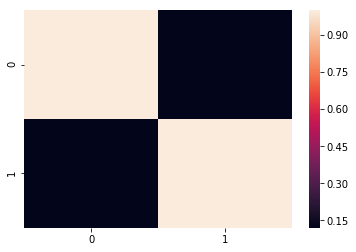

In [82]:
from codes.otherfunctions.multirun import get_cosines
cuz = get_cosines(np.swapaxes(replicates[0].dg_M[:,:,[264,732]], 1,2))
import seaborn as sns
%matplotlib inline
sns.heatmap(cuz)

In [95]:
reg_l1s = [0.05754887257315343] #.057 has 3, .058 has 1
GGL5 = GradientGroupLasso(replicates[0].dg_M[:300], replicates[0].df_M[:300], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
lr 125.0
3
lr 125.0
4
lr 125.0
5
lr 125.0
6
lr 125.0
7
lr 125.0
8
lr 125.0
9
lr 125.0
10
lr 125.0
11
lr 125.0
12
lr 125.0
13
lr 125.0
14
lr 125.0
15
lr 125.0
16
lr 125.0
17
lr 125.0
18
lr 125.0
19
lr 125.0
20
lr 125.0
21
lr 125.0
22
lr 125.0
23
lr 125.0
24
lr 125.0
25
lr 125.0
26
lr 125.0
27
lr 125.0
28
lr 125.0
29
lr 125.0
30
lr 125.0
31
lr 125.0
32
lr 125.0
33
lr 125.0
34
lr 125.0
35
lr 125.0
36
lr 125.0
37
lr 125.0
38
lr 125.0
39
lr 125.0
40
lr 125.0
41
lr 125.0
42
lr 125.0
43
lr 125.0
44
lr 125.0
45
lr 125.0
46
lr 125.0
47
lr 125.0
48
lr 125.0
49
lr 125.0
50
lr 125.0
51
lr 125.0
52
lr 125.0
53
lr 125.0
54
lr 125.0
55
lr 125.0
56
lr 125.0
57
lr 125.0
58
lr 125.0
59
lr 125.0
60
lr 125.0
61
lr 125.0
62
lr 125.0
63
lr 125.0
64
lr 125.0
65
lr 125.0
66
lr 125.0
67
lr 125.0
68
lr 125.0
69
lr 125.0
70
lr 125.0
71
lr 125.0
72
lr 125.0
73
lr 125.0
74
lr 125.0
75
lr 125.0
76
lr 125.0
77
lr 125.0
78
lr 125.0
79
lr 125.0
80
lr 125.0
81
lr 125.

In [96]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([709, 732])

In [ ]:
#dg_M[:,:,[14, 187, 740]].shape, df_M.shape

In [113]:
reg_l1s = [0.067654887257315343] #.0675 has 3, .058 has 1
GGL5 = GradientGroupLasso(replicates[0].dg_M[:400], replicates[0].df_M[:400], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 2

In [114]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([732, 738])

In [119]:
reg_l1s = [0.061654887257315343] #.0675 has 3, .058 has 1
GGL5 = GradientGroupLasso(replicates[0].dg_M[:350], replicates[0].df_M[:350], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000.0
lr 500.0
lr 250.0
lr 125.0
1
lr 125.0
2
lr 125.0
3
lr 125.0
4
lr 125.0
5
lr 125.0
6
lr 125.0
7
lr 125.0
8
lr 125.0
9
lr 125.0
10
lr 125.0
11
lr 125.0
12
lr 125.0
13
lr 125.0
14
lr 125.0
15
lr 125.0
16
lr 125.0
17
lr 125.0
18
lr 125.0
19
lr 125.0
20
lr 125.0
21
lr 125.0
22
lr 125.0
23
lr 125.0
24
lr 125.0
25
lr 125.0
26
lr 125.0
27
lr 125.0
28
lr 125.0
29
lr 125.0
30
lr 125.0
31
lr 125.0
32
lr 125.0
33
lr 125.0
34
lr 125.0
35
lr 125.0
36
lr 125.0
37
lr 125.0
38
lr 125.0
39
lr 125.0
40
lr 125.0
41
lr 125.0
42
lr 125.0
43
lr 125.0
44
lr 125.0
45
lr 125.0
46
lr 125.0
47
lr 125.0
48
lr 125.0
49
lr 125.0
50
lr 125.0
51
lr 125.0
52
lr 125.0
53
lr 125.0
54
lr 125.0
55
lr 125.0
56
lr 125.0
57
lr 125.0
58
lr 125.0
59
lr 125.0
60
lr 125.0
61
lr 125.0
62
lr 125.0
63
lr 125.0
64
lr 125.0
65
lr 125.0
66
lr 125.0
67
lr 125.0
68
lr 125.0
69
lr 125.0
70
lr 125.0
71
lr 125.0
72
lr 125.0
73
lr 125.0
74
lr 125.0
75
lr 125.0
76
lr 125.0
77
lr 125.0
78
lr 125.0
79
lr 125.0
80
lr 125.0
81
lr 125.

In [120]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([709, 732])

In [127]:
reg_l1s = [0.060054887257315343] #.0675 has 3, .058 has 1
GGL5 = GradientGroupLasso(replicates[0].dg_M[:325], replicates[0].df_M[:325], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
lr 125.0
3
lr 125.0
4
lr 125.0
5
lr 125.0
6
lr 125.0
7
lr 125.0
8
lr 125.0
9
lr 125.0
10
lr 125.0
11
lr 125.0
12
lr 125.0
13
lr 125.0
14
lr 125.0
15
lr 125.0
16
lr 125.0
17
lr 125.0
18
lr 125.0
19
lr 125.0
20
lr 125.0
21
lr 125.0
22
lr 125.0
23
lr 125.0
24
lr 125.0
25
lr 125.0
26
lr 125.0
27
lr 125.0
28
lr 125.0
29
lr 125.0
30
lr 125.0
31
lr 125.0
32
lr 125.0
33
lr 125.0
34
lr 125.0
35
lr 125.0
36
lr 125.0
37
lr 125.0
38
lr 125.0
39
lr 125.0
40
lr 125.0
41
lr 125.0
42
lr 125.0
43
lr 125.0
44
lr 125.0
45
lr 125.0
46
lr 125.0
47
lr 125.0
48
lr 125.0
49
lr 125.0
50
lr 125.0
51
lr 125.0
52
lr 125.0
53
lr 125.0
54
lr 125.0
55
lr 125.0
56
lr 125.0
57
lr 125.0
58
lr 125.0
59
lr 125.0
60
lr 125.0
61
lr 125.0
62
lr 125.0
63
lr 125.0
64
lr 125.0
65
lr 125.0
66
lr 125.0
67
lr 125.0
68
lr 125.0
69
lr 125.0
70
lr 125.0
71
lr 125.0
72
lr 125.0
73
lr 125.0
74
lr 125.0
75
lr 125.0
76
lr 125.0
77
lr 125.0
78
lr 125.0
79
lr 125.0
80
lr 125.0
81
lr 125.

In [128]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([732, 738])

In [133]:
reg_l1s = [0.015054887257315343] #.0675 has 3, .058 has 1
GGL5 = GradientGroupLasso(replicates[0].dg_M[300:325], replicates[0].df_M[300:325], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000.0
lr 500.0
lr 250.0
lr 125.0
lr 62.5
1
lr 62.5
2
lr 62.5
3
lr 62.5
4
lr 62.5
5
lr 62.5
6
lr 62.5
7
lr 62.5
8
lr 62.5
9
lr 62.5
10
lr 62.5
11
lr 62.5
12
lr 62.5
13
lr 62.5
14
lr 62.5
15
lr 62.5
16
lr 62.5
17
lr 62.5
18
lr 62.5
19
lr 62.5
20
lr 62.5
21
lr 62.5
22
lr 62.5
23
lr 62.5
24
lr 62.5
25
lr 62.5
26
lr 62.5
27
lr 62.5
28
lr 62.5
29
lr 62.5
30
lr 62.5
31
lr 62.5
32
lr 62.5
33
lr 62.5
34
lr 62.5
35
lr 62.5
36
lr 62.5
37
lr 62.5
38
lr 62.5
39
lr 62.5
40
lr 62.5
41
lr 62.5
42
lr 62.5
43
lr 62.5
44
lr 62.5
45
lr 62.5
46
lr 62.5
47
lr 62.5
48
lr 62.5
49
lr 62.5
50
lr 62.5
51
lr 62.5
52
lr 62.5
53
lr 62.5
54
lr 62.5
55
lr 62.5
56
lr 62.5
57
lr 62.5
58
lr 62.5
59
lr 62.5
60
lr 62.5
61
lr 62.5
62
lr 62.5
63
lr 62.5
64
lr 62.5
65
lr 62.5
66
lr 62.5
67
lr 62.5
68
lr 62.5
69
lr 62.5
70
lr 62.5
71
lr 62.5
72
lr 62.5
73
lr 62.5
74
lr 62.5
75
lr 62.5
76
lr 62.5
77
lr 62.5
78
lr 62.5
79
lr 62.5
80
lr 62.5
81
lr 62.5
82
lr 62.5
83
lr 62.5
84
lr 62.5
85
lr 62.5
86
lr 62.5
87
lr 62.5
88
lr

In [134]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([499, 738])

In [139]:
reg_l1s = [0.058054887257315343] #.0675 has 3, .058 has 1
GGL5 = GradientGroupLasso(replicates[0].dg_M[:312], replicates[0].df_M[:312], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000.0
lr 500.0
lr 250.0
lr 125.0
1
lr 125.0
2
lr 125.0
3
lr 125.0
4
lr 125.0
5
lr 125.0
6
lr 125.0
7
lr 125.0
8
lr 125.0
9
lr 125.0
10
lr 125.0
11
lr 125.0
12
lr 125.0
13
lr 125.0
14
lr 125.0
15
lr 125.0
16
lr 125.0
17
lr 125.0
18
lr 125.0
19
lr 125.0
20
lr 125.0
21
lr 125.0
22
lr 125.0
23
lr 125.0
24
lr 125.0
25
lr 125.0
26
lr 125.0
27
lr 125.0
28
lr 125.0
29
lr 125.0
30
lr 125.0
31
lr 125.0
32
lr 125.0
33
lr 125.0
34
lr 125.0
35
lr 125.0
36
lr 125.0
37
lr 125.0
38
lr 125.0
39
lr 125.0
40
lr 125.0
41
lr 125.0
42
lr 125.0
43
lr 125.0
44
lr 125.0
45
lr 125.0
46
lr 125.0
47
lr 125.0
48
lr 125.0
49
lr 125.0
50
lr 125.0
51
lr 125.0
52
lr 125.0
53
lr 125.0
54
lr 125.0
55
lr 125.0
56
lr 125.0
57
lr 125.0
58
lr 125.0
59
lr 125.0
60
lr 125.0
61
lr 125.0
62
lr 125.0
63
lr 125.0
64
lr 125.0
65
lr 125.0
66
lr 125.0
67
lr 125.0
68
lr 125.0
69
lr 125.0
70
lr 125.0
71
lr 125.0
72
lr 125.0
73
lr 125.0
74
lr 125.0
75
lr 125.0
76
lr 125.0
77
lr 125.0
78
lr 125.0
79
lr 125.0
80
lr 125.0
81
lr 125.

In [140]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([709, 732])

In [153]:
reg_l1s = [0.0595054887257315343] #.0598 has 1
GGL5 = GradientGroupLasso(replicates[0].dg_M[:319], replicates[0].df_M[:319], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
lr 125.0
3
lr 125.0
4
lr 125.0
5
lr 125.0
6
lr 125.0
7
lr 125.0
8
lr 125.0
9
lr 125.0
10
lr 125.0
11
lr 125.0
12
lr 125.0
13
lr 125.0
14
lr 125.0
15
lr 125.0
16
lr 125.0
17
lr 125.0
18
lr 125.0
19
lr 125.0
20
lr 125.0
21
lr 125.0
22
lr 125.0
23
lr 125.0
24
lr 125.0
25
lr 125.0
26
lr 125.0
27
lr 125.0
28
lr 125.0
29
lr 125.0
30
lr 125.0
31
lr 125.0
32
lr 125.0
33
lr 125.0
34
lr 125.0
35
lr 125.0
36
lr 125.0
37
lr 125.0
38
lr 125.0
39
lr 125.0
40
lr 125.0
41
lr 125.0
42
lr 125.0
43
lr 125.0
44
lr 125.0
45
lr 125.0
46
lr 125.0
47
lr 125.0
48
lr 125.0
49
lr 125.0
50
lr 125.0
51
lr 125.0
52
lr 125.0
53
lr 125.0
54
lr 125.0
55
lr 125.0
56
lr 125.0
57
lr 125.0
58
lr 125.0
59
lr 125.0
60
lr 125.0
61
lr 125.0
62
lr 125.0
63
lr 125.0
64
lr 125.0
65
lr 125.0
66
lr 125.0
67
lr 125.0
68
lr 125.0
69
lr 125.0
70
lr 125.0
71
lr 125.0
72
lr 125.0
73
lr 125.0
74
lr 125.0
75
lr 125.0
76
lr 125.0
77
lr 125.0
78
lr 125.0
79
lr 125.0
80
lr 125.0
81
lr 125.

In [154]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([732, 738])

In [231]:
reg_l1s = [0.0590054887257315343] #.0595 has 1
GGL5 = GradientGroupLasso(replicates[0].dg_M[:318], replicates[0].df_M[:318], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000.0
lr 500.0
lr 250.0
lr 125.0
1
lr 125.0
2
lr 125.0
3
lr 125.0
4
lr 125.0
5
lr 125.0
6
lr 125.0
7
lr 125.0
8
lr 125.0
9
lr 125.0
10
lr 125.0
11
lr 125.0
12
lr 125.0
13
lr 125.0
14
lr 125.0
15
lr 125.0
16
lr 125.0
17
lr 125.0
18
lr 125.0
19
lr 125.0
20
lr 125.0
21
lr 125.0
22
lr 125.0
23
lr 125.0
24
lr 125.0
25
lr 125.0
26
lr 125.0
27
lr 125.0
28
lr 125.0
29
lr 125.0
30
lr 125.0
31
lr 125.0
32
lr 125.0
33
lr 125.0
34
lr 125.0
35
lr 125.0
36
lr 125.0
37
lr 125.0
38
lr 125.0
39
lr 125.0
40
lr 125.0
41
lr 125.0
42
lr 125.0
43
lr 125.0
44
lr 125.0
45
lr 125.0
46
lr 125.0
47
lr 125.0
48
lr 125.0
49
lr 125.0
50
lr 125.0
51
lr 125.0
52
lr 125.0
53
lr 125.0
54
lr 125.0
55
lr 125.0
56
lr 125.0
57
lr 125.0
58
lr 125.0
59
lr 125.0
60
lr 125.0
61
lr 125.0
62
lr 125.0
63
lr 125.0
64
lr 125.0
65
lr 125.0
66
lr 125.0
67
lr 125.0
68
lr 125.0
69
lr 125.0
70
lr 125.0
71
lr 125.0
72
lr 125.0
73
lr 125.0
74
lr 125.0
75
lr 125.0
76
lr 125.0
77
lr 125.0
78
lr 125.0
79
lr 125.0
80
lr 125.0
81
lr 125.

In [232]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([709, 732])

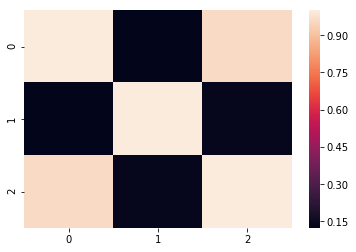

In [234]:
from codes.otherfunctions.multirun import get_cosines
cuz = get_cosines(np.swapaxes(replicates[0].dg_M[:,:,[732,709, 738]], 1,2))
import seaborn as sns
%matplotlib inline
sns.heatmap(cuz)

In [257]:
reg_l1s = [0.05940054887257315343] #.0595 has 1
GGL5 = GradientGroupLasso(replicates[0].dg_M[:319,:,[732,709, 738]], replicates[0].df_M[:319], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 2

In [258]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([0, 2])

In [301]:
reg_l1s = [0.05900054887257315343] #.0595 has 1
GGL5 = GradientGroupLasso(replicates[0].dg_M[0:318,:,[732,709, 738]], replicates[0].df_M[0:318], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
converged 0.05900054887257315


In [302]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([0, 1])

In [305]:
reg_l1s = [0.000900054887257315343] #.0595 has 1
GGL5 = GradientGroupLasso(replicates[0].dg_M[318:319,:,[732,709, 738]], replicates[0].df_M[318:319], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 2

In [306]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([1, 2])

In [316]:
reg_l1s = [0.000900054887257315343] #.0595 has 1
GGL5 = GradientGroupLasso(replicates[0].dg_M[[3,318]][:,:,[732,709, 738]], replicates[0].df_M[[3,318]], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 2

In [317]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([1, 2])

In [340]:
outie = []
for i in range(319):
    reg_l1s = [0.001] #.0595 has 1
    GGL5 = GradientGroupLasso(replicates[0].dg_M[i:(i+1)][:,:,[732,709, 738]], replicates[0].df_M[i:(i+1)], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
    GGL5.fit()
    outie.append(np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.))

0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 2

50
lr 500.0
51
lr 500.0
52
lr 500.0
53
lr 500.0
54
lr 500.0
55
lr 500.0
56
lr 500.0
57
lr 500.0
58
lr 500.0
59
lr 500.0
60
lr 500.0
61
lr 500.0
62
lr 500.0
63
lr 500.0
64
lr 500.0
65
lr 500.0
66
lr 500.0
67
lr 500.0
68
lr 500.0
converged 0.001
0
lr 1000.0
lr 500.0
lr 250.0
lr 125.0
1
lr 125.0
2
lr 125.0
3
lr 125.0
4
lr 125.0
5
lr 125.0
6
lr 125.0
7
lr 125.0
8
lr 125.0
9
lr 125.0
10
lr 125.0
11
lr 125.0
12
lr 125.0
13
lr 125.0
14
lr 125.0
15
lr 125.0
16
lr 125.0
17
lr 125.0
18
lr 125.0
19
lr 125.0
20
lr 125.0
21
lr 125.0
22
lr 125.0
23
lr 125.0
24
lr 125.0
25
lr 125.0
26
lr 125.0
27
lr 125.0
28
lr 125.0
29
lr 125.0
30
lr 125.0
31
lr 125.0
32
lr 125.0
33
lr 125.0
34
lr 125.0
35
lr 125.0
36
lr 125.0
37
lr 125.0
38
lr 125.0
39
lr 125.0
40
lr 125.0
41
lr 125.0
42
lr 125.0
43
lr 125.0
44
lr 125.0
45
lr 125.0
46
lr 125.0
47
lr 125.0
48
lr 125.0
49
lr 125.0
50
lr 125.0
51
lr 125.0
52
lr 125.0
53
lr 125.0
54
lr 125.0
55
lr 125.0
56
lr 125.0
57
lr 125.0
58
lr 125.0
59
lr 125.0
60
lr 125.0
61
lr 

74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 250.0
83
lr 250.0
84
lr 250.0
85
lr 250.0
86
lr 250.0
87
lr 250.0
88
lr 250.0
89
lr 250.0
90
lr 250.0
91
lr 250.0
92
lr 250.0
93
lr 250.0
94
lr 250.0
95
lr 250.0
96
lr 250.0
97
lr 250.0
98
lr 250.0
99
lr 250.0
100
lr 250.0
101
lr 250.0
102
lr 250.0
103
lr 250.0
104
lr 250.0
105
lr 250.0
106
lr 250.0
107
lr 250.0
108
lr 250.0
109
lr 250.0
110
lr 250.0
111
lr 250.0
112
lr 250.0
113
lr 250.0
114
lr 250.0
115
lr 250.0
116
lr 250.0
117
lr 250.0
118
lr 250.0
119
lr 250.0
120
lr 250.0
121
lr 250.0
122
lr 250.0
123
lr 250.0
124
lr 250.0
125
lr 250.0
126
lr 250.0
127
lr 250.0
128
lr 250.0
129
lr 250.0
130
lr 250.0
131
lr 250.0
132
lr 250.0
133
lr 250.0
134
lr 250.0
135
lr 250.0
136
lr 250.0
137
lr 250.0
138
lr 250.0
139
lr 250.0
140
lr 250.0
141
lr 250.0
142
lr 250.0
143
lr 250.0
144
lr 250.0
145
lr 250.0
146
lr 250.0
147
lr 250.0
148
lr 250.0
149
lr 250.0
150
lr 250.0
151
lr 250.0
152
lr 250.0

lr 62.5
282
lr 62.5
283
lr 62.5
284
lr 62.5
285
lr 62.5
286
lr 62.5
287
lr 62.5
lr 31.25
288
lr 31.25
289
lr 31.25
290
lr 31.25
291
lr 31.25
292
lr 31.25
293
lr 31.25
294
lr 31.25
295
lr 31.25
296
lr 31.25
297
lr 31.25
298
lr 31.25
299
lr 31.25
300
lr 31.25
301
lr 31.25
302
lr 31.25
303
lr 31.25
304
lr 31.25
305
lr 31.25
306
lr 31.25
307
lr 31.25
308
lr 31.25
309
lr 31.25
310
lr 31.25
311
lr 31.25
312
lr 31.25
313
lr 31.25
314
lr 31.25
315
lr 31.25
316
lr 31.25
317
lr 31.25
318
lr 31.25
319
lr 31.25
320
lr 31.25
321
lr 31.25
322
lr 31.25
323
lr 31.25
324
lr 31.25
325
lr 31.25
326
lr 31.25
327
lr 31.25
328
lr 31.25
329
lr 31.25
330
lr 31.25
331
lr 31.25
332
lr 31.25
lr 15.625
lr 7.8125
lr 3.90625
333
lr 3.90625
334
lr 3.90625
335
lr 3.90625
336
lr 3.90625
337
lr 3.90625
338
lr 3.90625
339
lr 3.90625
340
lr 3.90625
341
lr 3.90625
342
lr 3.90625
343
lr 3.90625
344
lr 3.90625
345
lr 3.90625
346
lr 3.90625
347
lr 3.90625
348
lr 3.90625
349
lr 3.90625
350
lr 3.90625
351
lr 3.90625
352
lr 3.9

lr 250.0
168
lr 250.0
169
lr 250.0
170
lr 250.0
171
lr 250.0
172
lr 250.0
173
lr 250.0
174
lr 250.0
175
lr 250.0
176
lr 250.0
177
lr 250.0
178
lr 250.0
179
lr 250.0
180
lr 250.0
181
lr 250.0
182
lr 250.0
183
lr 250.0
184
lr 250.0
185
lr 250.0
186
lr 250.0
187
lr 250.0
188
lr 250.0
189
lr 250.0
190
lr 250.0
191
lr 250.0
192
lr 250.0
193
lr 250.0
194
lr 250.0
195
lr 250.0
196
lr 250.0
197
lr 250.0
198
lr 250.0
199
lr 250.0
200
lr 250.0
201
lr 250.0
202
lr 250.0
203
lr 250.0
204
lr 250.0
205
lr 250.0
206
lr 250.0
207
lr 250.0
208
lr 250.0
209
lr 250.0
210
lr 250.0
211
lr 250.0
212
lr 250.0
213
lr 250.0
214
lr 250.0
215
lr 250.0
216
lr 250.0
217
lr 250.0
218
lr 250.0
219
lr 250.0
220
lr 250.0
221
lr 250.0
222
lr 250.0
223
lr 250.0
224
lr 250.0
225
lr 250.0
226
lr 250.0
227
lr 250.0
228
lr 250.0
229
lr 250.0
230
lr 250.0
231
lr 250.0
232
lr 250.0
233
lr 250.0
234
lr 250.0
235
lr 250.0
236
lr 250.0
237
lr 250.0
238
lr 250.0
239
lr 250.0
240
lr 250.0
241
lr 250.0
242
lr 250.0
243
lr 250.0
244

lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
converged 0.001
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 

lr 250.0
381
lr 250.0
382
lr 250.0
383
lr 250.0
384
lr 250.0
385
lr 250.0
386
lr 250.0
387
lr 250.0
388
lr 250.0
389
lr 250.0
390
lr 250.0
391
lr 250.0
392
lr 250.0
393
lr 250.0
394
lr 250.0
395
lr 250.0
396
lr 250.0
397
lr 250.0
398
lr 250.0
399
lr 250.0
400
lr 250.0
401
lr 250.0
402
lr 250.0
403
lr 250.0
404
lr 250.0
405
lr 250.0
406
lr 250.0
407
lr 250.0
408
lr 250.0
409
lr 250.0
410
lr 250.0
411
lr 250.0
412
lr 250.0
413
lr 250.0
414
lr 250.0
415
lr 250.0
416
lr 250.0
417
lr 250.0
418
lr 250.0
419
lr 250.0
420
lr 250.0
421
lr 250.0
422
lr 250.0
423
lr 250.0
424
lr 250.0
425
lr 250.0
426
lr 250.0
427
lr 250.0
428
lr 250.0
429
lr 250.0
430
lr 250.0
431
lr 250.0
432
lr 250.0
433
lr 250.0
434
lr 250.0
435
lr 250.0
436
lr 250.0
437
lr 250.0
438
lr 250.0
439
lr 250.0
440
lr 250.0
441
lr 250.0
442
lr 250.0
443
lr 250.0
444
lr 250.0
445
lr 250.0
446
lr 250.0
447
lr 250.0
448
lr 250.0
449
lr 250.0
450
lr 250.0
451
lr 250.0
452
lr 250.0
453
lr 250.0
454
lr 250.0
455
lr 250.0
456
lr 250.0
457

lr 500.0
361
lr 500.0
362
lr 500.0
363
lr 500.0
364
lr 500.0
365
lr 500.0
366
lr 500.0
367
lr 500.0
368
lr 500.0
369
lr 500.0
370
lr 500.0
371
lr 500.0
372
lr 500.0
373
lr 500.0
374
lr 500.0
375
lr 500.0
376
lr 500.0
377
lr 500.0
378
lr 500.0
379
lr 500.0
380
lr 500.0
381
lr 500.0
382
lr 500.0
383
lr 500.0
384
lr 500.0
385
lr 500.0
386
lr 500.0
387
lr 500.0
388
lr 500.0
389
lr 500.0
390
lr 500.0
391
lr 500.0
392
lr 500.0
393
lr 500.0
394
lr 500.0
395
lr 500.0
396
lr 500.0
397
lr 500.0
398
lr 500.0
399
lr 500.0
400
lr 500.0
401
lr 500.0
402
lr 500.0
403
lr 500.0
404
lr 500.0
405
lr 500.0
406
lr 500.0
407
lr 500.0
408
lr 500.0
409
lr 500.0
410
lr 500.0
411
lr 500.0
412
lr 500.0
413
lr 500.0
414
lr 500.0
415
lr 500.0
416
lr 500.0
417
lr 500.0
418
lr 500.0
419
lr 500.0
420
lr 500.0
421
lr 500.0
422
lr 500.0
423
lr 500.0
424
lr 500.0
425
lr 500.0
426
lr 500.0
427
lr 500.0
428
lr 500.0
429
lr 500.0
430
lr 500.0
431
lr 500.0
432
lr 500.0
433
lr 500.0
434
lr 500.0
435
lr 500.0
436
lr 500.0
437

lr 250.0
340
lr 250.0
341
lr 250.0
342
lr 250.0
343
lr 250.0
344
lr 250.0
345
lr 250.0
346
lr 250.0
347
lr 250.0
348
lr 250.0
349
lr 250.0
350
lr 250.0
351
lr 250.0
352
lr 250.0
353
lr 250.0
354
lr 250.0
355
lr 250.0
356
lr 250.0
357
lr 250.0
358
lr 250.0
359
lr 250.0
360
lr 250.0
361
lr 250.0
362
lr 250.0
363
lr 250.0
364
lr 250.0
365
lr 250.0
366
lr 250.0
367
lr 250.0
368
lr 250.0
369
lr 250.0
370
lr 250.0
371
lr 250.0
372
lr 250.0
373
lr 250.0
374
lr 250.0
375
lr 250.0
376
lr 250.0
377
lr 250.0
378
lr 250.0
379
lr 250.0
380
lr 250.0
381
lr 250.0
382
lr 250.0
383
lr 250.0
384
lr 250.0
385
lr 250.0
386
lr 250.0
387
lr 250.0
388
lr 250.0
389
lr 250.0
390
lr 250.0
391
lr 250.0
392
lr 250.0
393
lr 250.0
394
lr 250.0
395
lr 250.0
396
lr 250.0
397
lr 250.0
398
lr 250.0
399
lr 250.0
400
lr 250.0
401
lr 250.0
402
lr 250.0
403
lr 250.0
404
lr 250.0
405
lr 250.0
406
lr 250.0
407
lr 250.0
408
lr 250.0
409
lr 250.0
410
lr 250.0
411
lr 250.0
412
lr 250.0
413
lr 250.0
414
lr 250.0
415
lr 250.0
416

lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 250.0
83
lr 250.0
84
lr 250.0
85
lr 250.0
86
lr 250.0
87
lr 250.0
88
lr 250.0
89
lr 250.0
90
lr 250.0
91
lr 250.0
92
lr 250.0
93
lr 250.0
94
lr 250.0
95
lr 250.0
96
lr 250.0
97
lr 250.0
98
lr 250.0
99
lr 250.0
100
lr 250.0
101
lr 250.0
102
lr 250.0
103
lr 250.0
104
lr 250.0
10

lr 250.0
185
lr 250.0
186
lr 250.0
187
lr 250.0
188
lr 250.0
189
lr 250.0
190
lr 250.0
191
lr 250.0
192
lr 250.0
193
lr 250.0
194
lr 250.0
195
lr 250.0
196
lr 250.0
197
lr 250.0
198
lr 250.0
199
lr 250.0
200
lr 250.0
201
lr 250.0
202
lr 250.0
203
lr 250.0
204
lr 250.0
205
lr 250.0
206
lr 250.0
207
lr 250.0
208
lr 250.0
209
lr 250.0
210
lr 250.0
211
lr 250.0
212
lr 250.0
213
lr 250.0
214
lr 250.0
215
lr 250.0
216
lr 250.0
217
lr 250.0
218
lr 250.0
219
lr 250.0
220
lr 250.0
221
lr 250.0
222
lr 250.0
223
lr 250.0
224
lr 250.0
225
lr 250.0
226
lr 250.0
227
lr 250.0
228
lr 250.0
229
lr 250.0
230
lr 250.0
231
lr 250.0
232
lr 250.0
233
lr 250.0
234
lr 250.0
235
lr 250.0
236
lr 250.0
237
lr 250.0
238
lr 250.0
239
lr 250.0
240
lr 250.0
241
lr 250.0
242
lr 250.0
243
lr 250.0
244
lr 250.0
245
lr 250.0
246
lr 250.0
247
lr 250.0
248
lr 250.0
249
lr 250.0
250
lr 250.0
251
lr 250.0
252
lr 250.0
253
lr 250.0
254
lr 250.0
255
lr 250.0
256
lr 250.0
257
lr 250.0
258
lr 250.0
259
lr 250.0
260
lr 250.0
261

lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 250.0
83
lr 250.0
84
lr 250.0
85
lr 250.0
86
lr 250.0
87
lr 250.0
88
lr 250.0
89
lr 250.0
90
lr 250.0
91
lr 250.0
92
lr 250.0
93
lr 250.0
94
lr 250.0
95
lr 250.0
96
lr 250.0
97
lr 250.0
98
lr 250.0
99
lr 250.0
100
lr 250.0
101
lr 250.0
102
lr 250.0
103
lr 250.0
104
lr 250.0
105
lr 250.0
106
lr 250.0
107
lr 250.0
108
lr 250.0
109
lr 250.0
110
lr 25

lr 250.0
82
lr 250.0
83
lr 250.0
84
lr 250.0
85
lr 250.0
86
lr 250.0
87
lr 250.0
88
lr 250.0
89
lr 250.0
90
lr 250.0
91
lr 250.0
92
lr 250.0
93
lr 250.0
94
lr 250.0
95
lr 250.0
96
lr 250.0
97
lr 250.0
98
lr 250.0
99
lr 250.0
100
lr 250.0
101
lr 250.0
102
lr 250.0
103
lr 250.0
104
lr 250.0
105
lr 250.0
106
lr 250.0
107
lr 250.0
108
lr 250.0
109
lr 250.0
110
lr 250.0
111
lr 250.0
112
lr 250.0
113
lr 250.0
114
lr 250.0
115
lr 250.0
116
lr 250.0
117
lr 250.0
118
lr 250.0
119
lr 250.0
120
lr 250.0
121
lr 250.0
122
lr 250.0
123
lr 250.0
124
lr 250.0
125
lr 250.0
126
lr 250.0
127
lr 250.0
128
lr 250.0
129
lr 250.0
130
lr 250.0
131
lr 250.0
132
lr 250.0
133
lr 250.0
134
lr 250.0
135
lr 250.0
136
lr 250.0
137
lr 250.0
138
lr 250.0
139
lr 250.0
140
lr 250.0
141
lr 250.0
142
lr 250.0
143
lr 250.0
144
lr 250.0
145
lr 250.0
146
lr 250.0
147
lr 250.0
148
lr 250.0
149
lr 250.0
150
lr 250.0
151
lr 250.0
152
lr 250.0
153
lr 250.0
converged 0.001
0
lr 1000.0
lr 500.0
1
lr 500.0
2
lr 500.0
3
lr 500.0
4
l

66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 250.0
83
lr 250.0
84
lr 250.0
85
lr 250.0
86
lr 250.0
87
lr 250.0
88
lr 250.0
converged 0.001
0
lr 1000.0
lr 500.0
1
lr 500.0
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58


lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 250.0
83
lr 250.0
84
lr 250.0
85
lr 250.0
86
lr 250.0
87
lr 250.0
88
lr 250.0
89
lr 250.0
90
lr 250.0
91
lr 250.0
92
lr 250.0
93
lr 250.0
94
lr 250.0
95
lr 250.0
96
lr 250.0
converged 0.001
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 

lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
converged 0.001
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 25

lr 250.0
284
lr 250.0
285
lr 250.0
286
lr 250.0
287
lr 250.0
288
lr 250.0
289
lr 250.0
290
lr 250.0
291
lr 250.0
292
lr 250.0
293
lr 250.0
294
lr 250.0
295
lr 250.0
296
lr 250.0
297
lr 250.0
298
lr 250.0
299
lr 250.0
300
lr 250.0
301
lr 250.0
302
lr 250.0
303
lr 250.0
304
lr 250.0
305
lr 250.0
306
lr 250.0
307
lr 250.0
308
lr 250.0
309
lr 250.0
310
lr 250.0
311
lr 250.0
312
lr 250.0
313
lr 250.0
314
lr 250.0
315
lr 250.0
316
lr 250.0
317
lr 250.0
318
lr 250.0
319
lr 250.0
320
lr 250.0
321
lr 250.0
322
lr 250.0
323
lr 250.0
324
lr 250.0
325
lr 250.0
326
lr 250.0
327
lr 250.0
328
lr 250.0
329
lr 250.0
330
lr 250.0
331
lr 250.0
332
lr 250.0
333
lr 250.0
334
lr 250.0
335
lr 250.0
336
lr 250.0
337
lr 250.0
338
lr 250.0
339
lr 250.0
340
lr 250.0
341
lr 250.0
342
lr 250.0
343
lr 250.0
344
lr 250.0
345
lr 250.0
346
lr 250.0
347
lr 250.0
348
lr 250.0
349
lr 250.0
350
lr 250.0
351
lr 250.0
352
lr 250.0
353
lr 250.0
354
lr 250.0
355
lr 250.0
356
lr 250.0
357
lr 250.0
358
lr 250.0
359
lr 250.0
360

lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 250.0
83
lr 250.0
84
lr 250.0
85
lr 250.0
86
lr 250.0
87
lr 250.0


lr 500.0
15
lr 500.0
16
lr 500.0
17
lr 500.0
18
lr 500.0
19
lr 500.0
20
lr 500.0
21
lr 500.0
22
lr 500.0
23
lr 500.0
24
lr 500.0
25
lr 500.0
26
lr 500.0
27
lr 500.0
28
lr 500.0
29
lr 500.0
30
lr 500.0
31
lr 500.0
32
lr 500.0
33
lr 500.0
34
lr 500.0
35
lr 500.0
36
lr 500.0
37
lr 500.0
38
lr 500.0
39
lr 500.0
40
lr 500.0
41
lr 500.0
42
lr 500.0
43
lr 500.0
44
lr 500.0
45
lr 500.0
46
lr 500.0
47
lr 500.0
48
lr 500.0
49
lr 500.0
50
lr 500.0
51
lr 500.0
52
lr 500.0
53
lr 500.0
54
lr 500.0
55
lr 500.0
56
lr 500.0
57
lr 500.0
58
lr 500.0
59
lr 500.0
60
lr 500.0
61
lr 500.0
62
lr 500.0
63
lr 500.0
64
lr 500.0
65
lr 500.0
66
lr 500.0
67
lr 500.0
converged 0.001
0
lr 1000.0
lr 500.0
1
lr 500.0
2
lr 500.0
3
lr 500.0
4
lr 500.0
5
lr 500.0
6
lr 500.0
7
lr 500.0
8
lr 500.0
9
lr 500.0
10
lr 500.0
11
lr 500.0
12
lr 500.0
13
lr 500.0
14
lr 500.0
15
lr 500.0
16
lr 500.0
17
lr 500.0
18
lr 500.0
19
lr 500.0
20
lr 500.0
21
lr 500.0
22
lr 500.0
23
lr 500.0
24
lr 500.0
25
lr 500.0
26
lr 500.0
27
lr 500.0
28


lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
converged 0.001
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 

lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
converged 0.001
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 

lr 125.0
7
lr 125.0
8
lr 125.0
9
lr 125.0
10
lr 125.0
11
lr 125.0
12
lr 125.0
13
lr 125.0
14
lr 125.0
15
lr 125.0
16
lr 125.0
17
lr 125.0
18
lr 125.0
19
lr 125.0
20
lr 125.0
21
lr 125.0
22
lr 125.0
23
lr 125.0
24
lr 125.0
25
lr 125.0
26
lr 125.0
27
lr 125.0
28
lr 125.0
29
lr 125.0
30
lr 125.0
31
lr 125.0
32
lr 125.0
33
lr 125.0
34
lr 125.0
35
lr 125.0
36
lr 125.0
37
lr 125.0
38
lr 125.0
39
lr 125.0
40
lr 125.0
41
lr 125.0
42
lr 125.0
43
lr 125.0
44
lr 125.0
45
lr 125.0
46
lr 125.0
47
lr 125.0
48
lr 125.0
49
lr 125.0
50
lr 125.0
51
lr 125.0
52
lr 125.0
53
lr 125.0
54
lr 125.0
55
lr 125.0
56
lr 125.0
57
lr 125.0
58
lr 125.0
59
lr 125.0
60
lr 125.0
61
lr 125.0
62
lr 125.0
63
lr 125.0
64
lr 125.0
65
lr 125.0
66
lr 125.0
67
lr 125.0
68
lr 125.0
69
lr 125.0
70
lr 125.0
71
lr 125.0
72
lr 125.0
73
lr 125.0
74
lr 125.0
75
lr 125.0
76
lr 125.0
77
lr 125.0
78
lr 125.0
79
lr 125.0
80
lr 125.0
81
lr 125.0
82
lr 125.0
83
lr 125.0
84
lr 125.0
85
lr 125.0
86
lr 125.0
87
lr 125.0
88
lr 125.0
89
lr 125.

lr 500.0
19
lr 500.0
20
lr 500.0
21
lr 500.0
22
lr 500.0
23
lr 500.0
24
lr 500.0
25
lr 500.0
26
lr 500.0
27
lr 500.0
28
lr 500.0
29
lr 500.0
30
lr 500.0
31
lr 500.0
32
lr 500.0
33
lr 500.0
34
lr 500.0
35
lr 500.0
36
lr 500.0
37
lr 500.0
38
lr 500.0
converged 0.001
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 

lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
converged 0.001
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 

58
lr 125.0
59
lr 125.0
60
lr 125.0
61
lr 125.0
62
lr 125.0
63
lr 125.0
64
lr 125.0
65
lr 125.0
66
lr 125.0
67
lr 125.0
68
lr 125.0
69
lr 125.0
70
lr 125.0
71
lr 125.0
72
lr 125.0
73
lr 125.0
74
lr 125.0
75
lr 125.0
76
lr 125.0
77
lr 125.0
78
lr 125.0
79
lr 125.0
80
lr 125.0
81
lr 125.0
82
lr 125.0
83
lr 125.0
84
lr 125.0
85
lr 125.0
86
lr 125.0
87
lr 125.0
88
lr 125.0
89
lr 125.0
90
lr 125.0
91
lr 125.0
92
lr 125.0
93
lr 125.0
94
lr 125.0
95
lr 125.0
96
lr 125.0
97
lr 125.0
98
lr 125.0
99
lr 125.0
100
lr 125.0
101
lr 125.0
102
lr 125.0
103
lr 125.0
104
lr 125.0
105
lr 125.0
106
lr 125.0
107
lr 125.0
108
lr 125.0
109
lr 125.0
110
lr 125.0
converged 0.001
0
lr 1000.0
lr 500.0
1
lr 500.0
2
lr 500.0
3
lr 500.0
4
lr 500.0
5
lr 500.0
6
lr 500.0
7
lr 500.0
8
lr 500.0
9
lr 500.0
10
lr 500.0
11
lr 500.0
12
lr 500.0
13
lr 500.0
14
lr 500.0
15
lr 500.0
16
lr 500.0
17
lr 500.0
18
lr 500.0
19
lr 500.0
20
lr 500.0
21
lr 500.0
22
lr 500.0
23
lr 500.0
24
lr 500.0
25
lr 500.0
26
lr 500.0
27
lr 500.0
2

lr 7.275957614183426e-09
265
lr 7.275957614183426e-09
266
lr 7.275957614183426e-09
267
lr 7.275957614183426e-09
268
lr 7.275957614183426e-09
269
lr 7.275957614183426e-09
270
lr 7.275957614183426e-09
271
lr 7.275957614183426e-09
272
lr 7.275957614183426e-09
273
lr 7.275957614183426e-09
274
lr 7.275957614183426e-09
275
lr 7.275957614183426e-09
276
lr 7.275957614183426e-09
277
lr 7.275957614183426e-09
278
lr 7.275957614183426e-09
279
lr 7.275957614183426e-09
280
lr 7.275957614183426e-09
281
lr 7.275957614183426e-09
282
lr 7.275957614183426e-09
283
lr 7.275957614183426e-09
284
lr 7.275957614183426e-09
285
lr 7.275957614183426e-09
286
lr 7.275957614183426e-09
287
lr 7.275957614183426e-09
288
lr 7.275957614183426e-09
289
lr 7.275957614183426e-09
290
lr 7.275957614183426e-09
291
lr 7.275957614183426e-09
292
lr 7.275957614183426e-09
293
lr 7.275957614183426e-09
294
lr 7.275957614183426e-09
295
lr 7.275957614183426e-09
296
lr 7.275957614183426e-09
297
lr 7.275957614183426e-09
298
lr 7.275957614

lr 250.0
143
lr 250.0
144
lr 250.0
145
lr 250.0
146
lr 250.0
converged 0.001
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76

lr 1.4551915228366852e-08
191
lr 1.4551915228366852e-08
192
lr 1.4551915228366852e-08
193
lr 1.4551915228366852e-08
194
lr 1.4551915228366852e-08
195
lr 1.4551915228366852e-08
196
lr 1.4551915228366852e-08
197
lr 1.4551915228366852e-08
198
lr 1.4551915228366852e-08
199
lr 1.4551915228366852e-08
200
lr 1.4551915228366852e-08
201
lr 1.4551915228366852e-08
202
lr 1.4551915228366852e-08
203
lr 1.4551915228366852e-08
204
lr 1.4551915228366852e-08
205
lr 1.4551915228366852e-08
206
lr 1.4551915228366852e-08
207
lr 1.4551915228366852e-08
208
lr 1.4551915228366852e-08
209
lr 1.4551915228366852e-08
210
lr 1.4551915228366852e-08
211
lr 1.4551915228366852e-08
212
lr 1.4551915228366852e-08
213
lr 1.4551915228366852e-08
214
lr 1.4551915228366852e-08
215
lr 1.4551915228366852e-08
216
lr 1.4551915228366852e-08
217
lr 1.4551915228366852e-08
218
lr 1.4551915228366852e-08
219
lr 1.4551915228366852e-08
220
lr 1.4551915228366852e-08
221
lr 1.4551915228366852e-08
222
lr 1.4551915228366852e-08
223
lr 1.45519

22
lr 500.0
23
lr 500.0
24
lr 500.0
25
lr 500.0
26
lr 500.0
27
lr 500.0
28
lr 500.0
29
lr 500.0
30
lr 500.0
31
lr 500.0
32
lr 500.0
33
lr 500.0
34
lr 500.0
35
lr 500.0
36
lr 500.0
37
lr 500.0
38
lr 500.0
39
lr 500.0
40
lr 500.0
41
lr 500.0
42
lr 500.0
43
lr 500.0
44
lr 500.0
45
lr 500.0
46
lr 500.0
47
lr 500.0
48
lr 500.0
49
lr 500.0
50
lr 500.0
51
lr 500.0
52
lr 500.0
53
lr 500.0
54
lr 500.0
55
lr 500.0
56
lr 500.0
57
lr 500.0
58
lr 500.0
59
lr 500.0
60
lr 500.0
61
lr 500.0
62
lr 500.0
63
lr 500.0
converged 0.001
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39


5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 250.0
lr 125.0
83
lr 125.0
84
lr 125.0
converged 0.001
0
lr 1000.0
lr 500.0

lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 250.0
83
lr 250.0
84
lr 250.0
85
lr 250.0
86
lr 250.0
converged 0.001
0
lr 10

lr 250.0
499
lr 250.0
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250

400
lr 500.0
401
lr 500.0
402
lr 500.0
403
lr 500.0
404
lr 500.0
405
lr 500.0
406
lr 500.0
407
lr 500.0
408
lr 500.0
409
lr 500.0
410
lr 500.0
411
lr 500.0
412
lr 500.0
413
lr 500.0
414
lr 500.0
415
lr 500.0
416
lr 500.0
417
lr 500.0
418
lr 500.0
419
lr 500.0
420
lr 500.0
421
lr 500.0
422
lr 500.0
423
lr 500.0
424
lr 500.0
425
lr 500.0
426
lr 500.0
427
lr 500.0
428
lr 500.0
429
lr 500.0
430
lr 500.0
431
lr 500.0
432
lr 500.0
433
lr 500.0
434
lr 500.0
435
lr 500.0
436
lr 500.0
437
lr 500.0
438
lr 500.0
439
lr 500.0
440
lr 500.0
441
lr 500.0
442
lr 500.0
443
lr 500.0
444
lr 500.0
445
lr 500.0
446
lr 500.0
447
lr 500.0
448
lr 500.0
449
lr 500.0
450
lr 500.0
451
lr 500.0
452
lr 500.0
453
lr 500.0
454
lr 500.0
455
lr 500.0
456
lr 500.0
457
lr 500.0
458
lr 500.0
459
lr 500.0
460
lr 500.0
461
lr 500.0
462
lr 500.0
463
lr 500.0
464
lr 500.0
465
lr 500.0
466
lr 500.0
467
lr 500.0
468
lr 500.0
469
lr 500.0
470
lr 500.0
471
lr 500.0
472
lr 500.0
473
lr 500.0
474
lr 500.0
475
lr 500.0
476
lr 500.0

lr 250.0
126
lr 250.0
127
lr 250.0
128
lr 250.0
129
lr 250.0
130
lr 250.0
131
lr 250.0
132
lr 250.0
133
lr 250.0
134
lr 250.0
135
lr 250.0
136
lr 250.0
137
lr 250.0
138
lr 250.0
139
lr 250.0
140
lr 250.0
141
lr 250.0
142
lr 250.0
143
lr 250.0
144
lr 250.0
145
lr 250.0
146
lr 250.0
147
lr 250.0
148
lr 250.0
149
lr 250.0
150
lr 250.0
151
lr 250.0
152
lr 250.0
153
lr 250.0
154
lr 250.0
155
lr 250.0
156
lr 250.0
157
lr 250.0
158
lr 250.0
159
lr 250.0
160
lr 250.0
161
lr 250.0
162
lr 250.0
163
lr 250.0
164
lr 250.0
165
lr 250.0
166
lr 250.0
167
lr 250.0
168
lr 250.0
169
lr 250.0
170
lr 250.0
171
lr 250.0
172
lr 250.0
173
lr 250.0
174
lr 250.0
175
lr 250.0
176
lr 250.0
177
lr 250.0
178
lr 250.0
179
lr 250.0
180
lr 250.0
181
lr 250.0
182
lr 250.0
183
lr 250.0
184
lr 250.0
185
lr 250.0
186
lr 250.0
187
lr 250.0
188
lr 250.0
189
lr 250.0
190
lr 250.0
191
lr 250.0
192
lr 250.0
193
lr 250.0
194
lr 250.0
195
lr 250.0
196
lr 250.0
197
lr 250.0
198
lr 250.0
199
lr 250.0
200
lr 250.0
201
lr 250.0
202

lr 500.0
13
lr 500.0
14
lr 500.0
15
lr 500.0
16
lr 500.0
17
lr 500.0
18
lr 500.0
19
lr 500.0
20
lr 500.0
21
lr 500.0
22
lr 500.0
23
lr 500.0
24
lr 500.0
25
lr 500.0
26
lr 500.0
27
lr 500.0
28
lr 500.0
29
lr 500.0
30
lr 500.0
31
lr 500.0
32
lr 500.0
33
lr 500.0
34
lr 500.0
35
lr 500.0
36
lr 500.0
37
lr 500.0
38
lr 500.0
39
lr 500.0
40
lr 500.0
41
lr 500.0
42
lr 500.0
43
lr 500.0
44
lr 500.0
45
lr 500.0
46
lr 500.0
47
lr 500.0
48
lr 500.0
49
lr 500.0
50
lr 500.0
51
lr 500.0
52
lr 500.0
53
lr 500.0
54
lr 500.0
55
lr 500.0
56
lr 500.0
57
lr 500.0
58
lr 500.0
59
lr 500.0
60
lr 500.0
61
lr 500.0
62
lr 500.0
63
lr 500.0
64
lr 500.0
65
lr 500.0
converged 0.001
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 

424
lr 250.0
425
lr 250.0
426
lr 250.0
427
lr 250.0
428
lr 250.0
429
lr 250.0
430
lr 250.0
431
lr 250.0
432
lr 250.0
433
lr 250.0
434
lr 250.0
435
lr 250.0
436
lr 250.0
437
lr 250.0
438
lr 250.0
439
lr 250.0
440
lr 250.0
441
lr 250.0
442
lr 250.0
443
lr 250.0
444
lr 250.0
445
lr 250.0
446
lr 250.0
447
lr 250.0
448
lr 250.0
449
lr 250.0
450
lr 250.0
451
lr 250.0
452
lr 250.0
453
lr 250.0
454
lr 250.0
455
lr 250.0
456
lr 250.0
457
lr 250.0
458
lr 250.0
459
lr 250.0
460
lr 250.0
461
lr 250.0
462
lr 250.0
463
lr 250.0
464
lr 250.0
465
lr 250.0
466
lr 250.0
467
lr 250.0
468
lr 250.0
469
lr 250.0
470
lr 250.0
471
lr 250.0
472
lr 250.0
473
lr 250.0
474
lr 250.0
475
lr 250.0
476
lr 250.0
477
lr 250.0
478
lr 250.0
479
lr 250.0
480
lr 250.0
481
lr 250.0
482
lr 250.0
483
lr 250.0
484
lr 250.0
485
lr 250.0
486
lr 250.0
487
lr 250.0
488
lr 250.0
489
lr 250.0
490
lr 250.0
491
lr 250.0
492
lr 250.0
493
lr 250.0
494
lr 250.0
495
lr 250.0
496
lr 250.0
497
lr 250.0
498
lr 250.0
499
lr 250.0
0
lr 1000.0


lr 500.0
63
lr 500.0
64
lr 500.0
65
lr 500.0
66
lr 500.0
67
lr 500.0
68
lr 500.0
69
lr 500.0
70
lr 500.0
71
lr 500.0
72
lr 500.0
73
lr 500.0
74
lr 500.0
75
lr 500.0
76
lr 500.0
77
lr 500.0
78
lr 500.0
79
lr 500.0
80
lr 500.0
81
lr 500.0
82
lr 500.0
83
lr 500.0
84
lr 500.0
85
lr 500.0
86
lr 500.0
87
lr 500.0
88
lr 500.0
89
lr 500.0
90
lr 500.0
91
lr 500.0
92
lr 500.0
93
lr 500.0
94
lr 500.0
95
lr 500.0
96
lr 500.0
97
lr 500.0
98
lr 500.0
99
lr 500.0
100
lr 500.0
101
lr 500.0
102
lr 500.0
103
lr 500.0
104
lr 500.0
105
lr 500.0
106
lr 500.0
107
lr 500.0
108
lr 500.0
109
lr 500.0
110
lr 500.0
111
lr 500.0
112
lr 500.0
113
lr 500.0
114
lr 500.0
115
lr 500.0
116
lr 500.0
117
lr 500.0
118
lr 500.0
119
lr 500.0
120
lr 500.0
121
lr 500.0
122
lr 500.0
123
lr 500.0
124
lr 500.0
125
lr 500.0
126
lr 500.0
127
lr 500.0
128
lr 500.0
129
lr 500.0
130
lr 500.0
131
lr 500.0
132
lr 500.0
133
lr 500.0
134
lr 500.0
135
lr 500.0
136
lr 500.0
137
lr 500.0
138
lr 500.0
139
lr 500.0
140
lr 500.0
141
lr 500.0
1

lr 500.0
16
lr 500.0
17
lr 500.0
18
lr 500.0
19
lr 500.0
20
lr 500.0
21
lr 500.0
22
lr 500.0
23
lr 500.0
24
lr 500.0
25
lr 500.0
26
lr 500.0
27
lr 500.0
28
lr 500.0
29
lr 500.0
30
lr 500.0
31
lr 500.0
32
lr 500.0
33
lr 500.0
34
lr 500.0
35
lr 500.0
36
lr 500.0
37
lr 500.0
38
lr 500.0
39
lr 500.0
40
lr 500.0
41
lr 500.0
42
lr 500.0
43
lr 500.0
44
lr 500.0
45
lr 500.0
46
lr 500.0
47
lr 500.0
48
lr 500.0
49
lr 500.0
50
lr 500.0
51
lr 500.0
52
lr 500.0
53
lr 500.0
54
lr 500.0
55
lr 500.0
56
lr 500.0
57
lr 500.0
58
lr 500.0
59
lr 500.0
converged 0.001
0
lr 1000.0
lr 500.0
1
lr 500.0
2
lr 500.0
3
lr 500.0
4
lr 500.0
5
lr 500.0
6
lr 500.0
7
lr 500.0
8
lr 500.0
9
lr 500.0
10
lr 500.0
11
lr 500.0
12
lr 500.0
13
lr 500.0
14
lr 500.0
15
lr 500.0
16
lr 500.0
17
lr 500.0
18
lr 500.0
19
lr 500.0
20
lr 500.0
21
lr 500.0
22
lr 500.0
23
lr 500.0
24
lr 500.0
25
lr 500.0
26
lr 500.0
27
lr 500.0
28
lr 500.0
29
lr 500.0
30
lr 500.0
31
lr 500.0
32
lr 500.0
33
lr 500.0
34
lr 500.0
35
lr 500.0
36
lr 500.0
37


192
lr 250.0
193
lr 250.0
194
lr 250.0
195
lr 250.0
196
lr 250.0
197
lr 250.0
198
lr 250.0
199
lr 250.0
200
lr 250.0
201
lr 250.0
202
lr 250.0
203
lr 250.0
204
lr 250.0
205
lr 250.0
206
lr 250.0
207
lr 250.0
208
lr 250.0
209
lr 250.0
210
lr 250.0
211
lr 250.0
212
lr 250.0
213
lr 250.0
214
lr 250.0
215
lr 250.0
216
lr 250.0
217
lr 250.0
218
lr 250.0
219
lr 250.0
220
lr 250.0
221
lr 250.0
222
lr 250.0
223
lr 250.0
224
lr 250.0
225
lr 250.0
226
lr 250.0
227
lr 250.0
228
lr 250.0
229
lr 250.0
230
lr 250.0
231
lr 250.0
232
lr 250.0
233
lr 250.0
234
lr 250.0
235
lr 250.0
236
lr 250.0
237
lr 250.0
238
lr 250.0
239
lr 250.0
240
lr 250.0
241
lr 250.0
242
lr 250.0
243
lr 250.0
244
lr 250.0
245
lr 250.0
246
lr 250.0
247
lr 250.0
248
lr 250.0
249
lr 250.0
250
lr 250.0
251
lr 250.0
252
lr 250.0
253
lr 250.0
254
lr 250.0
255
lr 250.0
256
lr 250.0
257
lr 250.0
258
lr 250.0
259
lr 250.0
260
lr 250.0
261
lr 250.0
262
lr 250.0
263
lr 250.0
264
lr 250.0
265
lr 250.0
266
lr 250.0
267
lr 250.0
268
lr 250.0

lr 500.0
94
lr 500.0
95
lr 500.0
96
lr 500.0
97
lr 500.0
98
lr 500.0
99
lr 500.0
100
lr 500.0
101
lr 500.0
102
lr 500.0
103
lr 500.0
104
lr 500.0
105
lr 500.0
106
lr 500.0
107
lr 500.0
108
lr 500.0
109
lr 500.0
110
lr 500.0
111
lr 500.0
112
lr 500.0
113
lr 500.0
114
lr 500.0
115
lr 500.0
116
lr 500.0
117
lr 500.0
118
lr 500.0
119
lr 500.0
120
lr 500.0
121
lr 500.0
122
lr 500.0
123
lr 500.0
124
lr 500.0
125
lr 500.0
126
lr 500.0
127
lr 500.0
128
lr 500.0
129
lr 500.0
130
lr 500.0
131
lr 500.0
132
lr 500.0
133
lr 500.0
134
lr 500.0
135
lr 500.0
136
lr 500.0
137
lr 500.0
138
lr 500.0
139
lr 500.0
140
lr 500.0
141
lr 500.0
142
lr 500.0
143
lr 500.0
144
lr 500.0
145
lr 500.0
146
lr 500.0
147
lr 500.0
148
lr 500.0
149
lr 500.0
150
lr 500.0
151
lr 500.0
152
lr 500.0
153
lr 500.0
154
lr 500.0
155
lr 500.0
156
lr 500.0
157
lr 500.0
158
lr 500.0
159
lr 500.0
160
lr 500.0
161
lr 500.0
162
lr 500.0
163
lr 500.0
164
lr 500.0
165
lr 500.0
166
lr 500.0
167
lr 500.0
168
lr 500.0
169
lr 500.0
170
lr 50

lr 250.0
95
lr 250.0
96
lr 250.0
97
lr 250.0
98
lr 250.0
99
lr 250.0
100
lr 250.0
101
lr 250.0
102
lr 250.0
103
lr 250.0
104
lr 250.0
105
lr 250.0
106
lr 250.0
107
lr 250.0
108
lr 250.0
109
lr 250.0
110
lr 250.0
111
lr 250.0
112
lr 250.0
113
lr 250.0
114
lr 250.0
115
lr 250.0
116
lr 250.0
117
lr 250.0
118
lr 250.0
119
lr 250.0
120
lr 250.0
121
lr 250.0
122
lr 250.0
123
lr 250.0
124
lr 250.0
125
lr 250.0
126
lr 250.0
127
lr 250.0
128
lr 250.0
129
lr 250.0
130
lr 250.0
131
lr 250.0
132
lr 250.0
133
lr 250.0
134
lr 250.0
135
lr 250.0
136
lr 250.0
137
lr 250.0
138
lr 250.0
139
lr 250.0
140
lr 250.0
141
lr 250.0
142
lr 250.0
143
lr 250.0
144
lr 250.0
145
lr 250.0
146
lr 250.0
147
lr 250.0
148
lr 250.0
149
lr 250.0
150
lr 250.0
151
lr 250.0
152
lr 250.0
153
lr 250.0
154
lr 250.0
155
lr 250.0
156
lr 250.0
157
lr 250.0
158
lr 250.0
159
lr 250.0
160
lr 250.0
161
lr 250.0
162
lr 250.0
163
lr 250.0
164
lr 250.0
165
lr 250.0
166
lr 250.0
167
lr 250.0
168
lr 250.0
169
lr 250.0
170
lr 250.0
171
lr 2

5
lr 500.0
6
lr 500.0
7
lr 500.0
8
lr 500.0
9
lr 500.0
10
lr 500.0
11
lr 500.0
12
lr 500.0
13
lr 500.0
14
lr 500.0
15
lr 500.0
16
lr 500.0
17
lr 500.0
18
lr 500.0
19
lr 500.0
20
lr 500.0
21
lr 500.0
22
lr 500.0
23
lr 500.0
24
lr 500.0
25
lr 500.0
26
lr 500.0
27
lr 500.0
28
lr 500.0
29
lr 500.0
30
lr 500.0
31
lr 500.0
32
lr 500.0
33
lr 500.0
34
lr 500.0
35
lr 500.0
36
lr 500.0
37
lr 500.0
38
lr 500.0
39
lr 500.0
40
lr 500.0
41
lr 500.0
42
lr 500.0
43
lr 500.0
44
lr 500.0
45
lr 500.0
46
lr 500.0
47
lr 500.0
48
lr 500.0
49
lr 500.0
50
lr 500.0
51
lr 500.0
52
lr 500.0
53
lr 500.0
54
lr 500.0
55
lr 500.0
56
lr 500.0
57
lr 500.0
58
lr 500.0
59
lr 500.0
60
lr 500.0
61
lr 500.0
62
lr 500.0
63
lr 500.0
64
lr 500.0
65
lr 500.0
66
lr 500.0
67
lr 500.0
68
lr 500.0
69
lr 500.0
70
lr 500.0
71
lr 500.0
72
lr 500.0
73
lr 500.0
74
lr 500.0
75
lr 500.0
76
lr 500.0
77
lr 500.0
78
lr 500.0
79
lr 500.0
converged 0.001
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr

lr 250.0
94
lr 250.0
95
lr 250.0
96
lr 250.0
97
lr 250.0
98
lr 250.0
99
lr 250.0
100
lr 250.0
101
lr 250.0
102
lr 250.0
103
lr 250.0
104
lr 250.0
105
lr 250.0
106
lr 250.0
107
lr 250.0
108
lr 250.0
109
lr 250.0
110
lr 250.0
111
lr 250.0
112
lr 250.0
113
lr 250.0
114
lr 250.0
115
lr 250.0
116
lr 250.0
117
lr 250.0
118
lr 250.0
119
lr 250.0
120
lr 250.0
121
lr 250.0
122
lr 250.0
123
lr 250.0
124
lr 250.0
125
lr 250.0
126
lr 250.0
127
lr 250.0
128
lr 250.0
129
lr 250.0
130
lr 250.0
131
lr 250.0
132
lr 250.0
133
lr 250.0
134
lr 250.0
135
lr 250.0
136
lr 250.0
137
lr 250.0
138
lr 250.0
139
lr 250.0
140
lr 250.0
141
lr 250.0
142
lr 250.0
143
lr 250.0
144
lr 250.0
145
lr 250.0
146
lr 250.0
147
lr 250.0
148
lr 250.0
149
lr 250.0
150
lr 250.0
151
lr 250.0
152
lr 250.0
153
lr 250.0
154
lr 250.0
155
lr 250.0
156
lr 250.0
157
lr 250.0
158
lr 250.0
159
lr 250.0
160
lr 250.0
161
lr 250.0
162
lr 250.0
163
lr 250.0
164
lr 250.0
converged 0.001
0
lr 1000.0
lr 500.0
1
lr 500.0
2
lr 500.0
3
lr 500.0
4
lr

160
lr 250.0
161
lr 250.0
162
lr 250.0
163
lr 250.0
164
lr 250.0
165
lr 250.0
166
lr 250.0
167
lr 250.0
168
lr 250.0
169
lr 250.0
170
lr 250.0
171
lr 250.0
172
lr 250.0
173
lr 250.0
174
lr 250.0
175
lr 250.0
176
lr 250.0
177
lr 250.0
178
lr 250.0
179
lr 250.0
180
lr 250.0
181
lr 250.0
182
lr 250.0
183
lr 250.0
184
lr 250.0
185
lr 250.0
186
lr 250.0
187
lr 250.0
188
lr 250.0
189
lr 250.0
190
lr 250.0
191
lr 250.0
192
lr 250.0
193
lr 250.0
194
lr 250.0
195
lr 250.0
196
lr 250.0
197
lr 250.0
198
lr 250.0
199
lr 250.0
200
lr 250.0
201
lr 250.0
202
lr 250.0
203
lr 250.0
204
lr 250.0
205
lr 250.0
206
lr 250.0
207
lr 250.0
208
lr 250.0
209
lr 250.0
210
lr 250.0
211
lr 250.0
212
lr 250.0
213
lr 250.0
214
lr 250.0
215
lr 250.0
216
lr 250.0
217
lr 250.0
218
lr 250.0
219
lr 250.0
220
lr 250.0
221
lr 250.0
222
lr 250.0
223
lr 250.0
224
lr 250.0
225
lr 250.0
226
lr 250.0
227
lr 250.0
228
lr 250.0
229
lr 250.0
230
lr 250.0
231
lr 250.0
232
lr 250.0
233
lr 250.0
234
lr 250.0
235
lr 250.0
236
lr 250.0

lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 250.0
83
lr 250.0
84
lr 250.0
85
lr 250.0
86
lr 250.0
87
lr 250.0
88
lr 250.0
89
lr 250.

34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
converged 0.001
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54


lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 250.0
83
lr 250.0
84
lr 250.0
85
lr 250.0
86
lr 250.0
87
lr 250.0
88
lr 250.0
89
lr 250.0
90
lr 250.0
91
lr 250.0
92
lr 250.0
93
lr 250.0
94
lr 250.0
95
lr 250.0
96
lr 250.0
97
lr 250.0
98
lr 250.0
99
lr 250.0
100
lr 250.0
101
lr 250.0
102
lr 250.0
103
lr 250.0
104
lr 250.0
105
lr 250.0
106
lr 250.0
107
lr 250.0
108
lr 250.0
109
lr 250.0
110
lr 250.0
111
lr 250.0
112
lr 250.0
113
lr 250.0
114
lr 250.0
115
lr 250.0
116
lr 250.0
117
lr 250.0
118
lr 250.0
119
lr 250.0
120
lr 250.0
121
lr 250.0
122
lr 250.0
123
lr 250.0
124
lr 250.0
converged 0.001
0
lr 1000.0
lr

lr 500.0
283
lr 500.0
284
lr 500.0
285
lr 500.0
286
lr 500.0
287
lr 500.0
288
lr 500.0
289
lr 500.0
290
lr 500.0
291
lr 500.0
292
lr 500.0
293
lr 500.0
294
lr 500.0
295
lr 500.0
296
lr 500.0
297
lr 500.0
298
lr 500.0
299
lr 500.0
300
lr 500.0
301
lr 500.0
302
lr 500.0
303
lr 500.0
304
lr 500.0
305
lr 500.0
306
lr 500.0
307
lr 500.0
308
lr 500.0
309
lr 500.0
310
lr 500.0
311
lr 500.0
312
lr 500.0
313
lr 500.0
314
lr 500.0
315
lr 500.0
316
lr 500.0
317
lr 500.0
318
lr 500.0
319
lr 500.0
320
lr 500.0
321
lr 500.0
322
lr 500.0
323
lr 500.0
324
lr 500.0
325
lr 500.0
326
lr 500.0
327
lr 500.0
328
lr 500.0
329
lr 500.0
330
lr 500.0
331
lr 500.0
332
lr 500.0
333
lr 500.0
334
lr 500.0
335
lr 500.0
336
lr 500.0
337
lr 500.0
338
lr 500.0
339
lr 500.0
340
lr 500.0
341
lr 500.0
342
lr 500.0
343
lr 500.0
344
lr 500.0
345
lr 500.0
346
lr 500.0
347
lr 500.0
348
lr 500.0
349
lr 500.0
350
lr 500.0
351
lr 500.0
352
lr 500.0
353
lr 500.0
354
lr 500.0
355
lr 500.0
356
lr 500.0
357
lr 500.0
358
lr 500.0
359

lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 250.0
83
lr 250.0
converged 0.001
0
lr 1000.0
lr 500.0
1
lr 500.0
lr 250.0
2
lr 250.0
3
lr 250.0
4


lr 500.0
316
lr 500.0
317
lr 500.0
318
lr 500.0
319
lr 500.0
320
lr 500.0
321
lr 500.0
322
lr 500.0
323
lr 500.0
324
lr 500.0
325
lr 500.0
326
lr 500.0
327
lr 500.0
328
lr 500.0
329
lr 500.0
330
lr 500.0
331
lr 500.0
332
lr 500.0
333
lr 500.0
334
lr 500.0
335
lr 500.0
336
lr 500.0
337
lr 500.0
338
lr 500.0
339
lr 500.0
340
lr 500.0
341
lr 500.0
342
lr 500.0
343
lr 500.0
344
lr 500.0
345
lr 500.0
346
lr 500.0
347
lr 500.0
348
lr 500.0
349
lr 500.0
350
lr 500.0
351
lr 500.0
352
lr 500.0
353
lr 500.0
354
lr 500.0
355
lr 500.0
356
lr 500.0
357
lr 500.0
358
lr 500.0
359
lr 500.0
360
lr 500.0
361
lr 500.0
362
lr 500.0
363
lr 500.0
364
lr 500.0
365
lr 500.0
366
lr 500.0
367
lr 500.0
368
lr 500.0
369
lr 500.0
370
lr 500.0
371
lr 500.0
372
lr 500.0
373
lr 500.0
374
lr 500.0
375
lr 500.0
376
lr 500.0
377
lr 500.0
378
lr 500.0
379
lr 500.0
380
lr 500.0
381
lr 500.0
382
lr 500.0
383
lr 500.0
384
lr 500.0
385
lr 500.0
386
lr 500.0
387
lr 500.0
388
lr 500.0
389
lr 500.0
390
lr 500.0
391
lr 500.0
392

lr 250.0
190
lr 250.0
191
lr 250.0
192
lr 250.0
193
lr 250.0
194
lr 250.0
195
lr 250.0
196
lr 250.0
197
lr 250.0
198
lr 250.0
199
lr 250.0
200
lr 250.0
201
lr 250.0
202
lr 250.0
203
lr 250.0
204
lr 250.0
205
lr 250.0
206
lr 250.0
207
lr 250.0
208
lr 250.0
209
lr 250.0
210
lr 250.0
211
lr 250.0
212
lr 250.0
213
lr 250.0
214
lr 250.0
215
lr 250.0
216
lr 250.0
217
lr 250.0
218
lr 250.0
219
lr 250.0
220
lr 250.0
221
lr 250.0
222
lr 250.0
223
lr 250.0
224
lr 250.0
225
lr 250.0
226
lr 250.0
227
lr 250.0
228
lr 250.0
229
lr 250.0
230
lr 250.0
231
lr 250.0
232
lr 250.0
233
lr 250.0
234
lr 250.0
235
lr 250.0
236
lr 250.0
237
lr 250.0
238
lr 250.0
239
lr 250.0
240
lr 250.0
241
lr 250.0
242
lr 250.0
243
lr 250.0
244
lr 250.0
245
lr 250.0
246
lr 250.0
247
lr 250.0
248
lr 250.0
249
lr 250.0
250
lr 250.0
251
lr 250.0
252
lr 250.0
253
lr 250.0
254
lr 250.0
255
lr 250.0
256
lr 250.0
257
lr 250.0
258
lr 250.0
259
lr 250.0
260
lr 250.0
261
lr 250.0
262
lr 250.0
263
lr 250.0
264
lr 250.0
265
lr 250.0
266

lr 250.0
308
lr 250.0
309
lr 250.0
310
lr 250.0
311
lr 250.0
312
lr 250.0
313
lr 250.0
314
lr 250.0
315
lr 250.0
316
lr 250.0
317
lr 250.0
318
lr 250.0
319
lr 250.0
320
lr 250.0
321
lr 250.0
322
lr 250.0
323
lr 250.0
324
lr 250.0
325
lr 250.0
326
lr 250.0
327
lr 250.0
328
lr 250.0
329
lr 250.0
330
lr 250.0
331
lr 250.0
332
lr 250.0
333
lr 250.0
334
lr 250.0
335
lr 250.0
336
lr 250.0
337
lr 250.0
338
lr 250.0
339
lr 250.0
340
lr 250.0
341
lr 250.0
342
lr 250.0
343
lr 250.0
344
lr 250.0
345
lr 250.0
346
lr 250.0
347
lr 250.0
348
lr 250.0
349
lr 250.0
350
lr 250.0
351
lr 250.0
352
lr 250.0
353
lr 250.0
354
lr 250.0
355
lr 250.0
356
lr 250.0
357
lr 250.0
358
lr 250.0
359
lr 250.0
360
lr 250.0
361
lr 250.0
362
lr 250.0
363
lr 250.0
364
lr 250.0
365
lr 250.0
366
lr 250.0
367
lr 250.0
368
lr 250.0
369
lr 250.0
370
lr 250.0
371
lr 250.0
372
lr 250.0
373
lr 250.0
374
lr 250.0
375
lr 250.0
376
lr 250.0
377
lr 250.0
378
lr 250.0
379
lr 250.0
380
lr 250.0
381
lr 250.0
382
lr 250.0
383
lr 250.0
384

lr 250.0
334
lr 250.0
335
lr 250.0
336
lr 250.0
337
lr 250.0
338
lr 250.0
339
lr 250.0
340
lr 250.0
341
lr 250.0
342
lr 250.0
343
lr 250.0
344
lr 250.0
345
lr 250.0
346
lr 250.0
347
lr 250.0
348
lr 250.0
349
lr 250.0
350
lr 250.0
351
lr 250.0
352
lr 250.0
353
lr 250.0
354
lr 250.0
355
lr 250.0
356
lr 250.0
357
lr 250.0
358
lr 250.0
359
lr 250.0
360
lr 250.0
361
lr 250.0
362
lr 250.0
363
lr 250.0
364
lr 250.0
365
lr 250.0
366
lr 250.0
367
lr 250.0
368
lr 250.0
369
lr 250.0
370
lr 250.0
371
lr 250.0
372
lr 250.0
373
lr 250.0
374
lr 250.0
375
lr 250.0
376
lr 250.0
377
lr 250.0
378
lr 250.0
379
lr 250.0
380
lr 250.0
381
lr 250.0
382
lr 250.0
383
lr 250.0
384
lr 250.0
385
lr 250.0
386
lr 250.0
387
lr 250.0
388
lr 250.0
389
lr 250.0
390
lr 250.0
391
lr 250.0
392
lr 250.0
393
lr 250.0
394
lr 250.0
395
lr 250.0
396
lr 250.0
397
lr 250.0
398
lr 250.0
399
lr 250.0
400
lr 250.0
401
lr 250.0
402
lr 250.0
403
lr 250.0
404
lr 250.0
405
lr 250.0
406
lr 250.0
407
lr 250.0
408
lr 250.0
409
lr 250.0
410

lr 250.0
253
lr 250.0
254
lr 250.0
255
lr 250.0
256
lr 250.0
257
lr 250.0
258
lr 250.0
259
lr 250.0
260
lr 250.0
261
lr 250.0
262
lr 250.0
263
lr 250.0
264
lr 250.0
265
lr 250.0
266
lr 250.0
267
lr 250.0
268
lr 250.0
269
lr 250.0
270
lr 250.0
271
lr 250.0
272
lr 250.0
273
lr 250.0
274
lr 250.0
275
lr 250.0
276
lr 250.0
277
lr 250.0
278
lr 250.0
279
lr 250.0
280
lr 250.0
281
lr 250.0
282
lr 250.0
283
lr 250.0
284
lr 250.0
285
lr 250.0
286
lr 250.0
287
lr 250.0
288
lr 250.0
289
lr 250.0
290
lr 250.0
291
lr 250.0
292
lr 250.0
293
lr 250.0
294
lr 250.0
295
lr 250.0
296
lr 250.0
297
lr 250.0
298
lr 250.0
299
lr 250.0
300
lr 250.0
301
lr 250.0
302
lr 250.0
303
lr 250.0
304
lr 250.0
305
lr 250.0
306
lr 250.0
307
lr 250.0
308
lr 250.0
309
lr 250.0
310
lr 250.0
311
lr 250.0
312
lr 250.0
313
lr 250.0
314
lr 250.0
315
lr 250.0
316
lr 250.0
317
lr 250.0
318
lr 250.0
319
lr 250.0
320
lr 250.0
321
lr 250.0
322
lr 250.0
323
lr 250.0
324
lr 250.0
325
lr 250.0
326
lr 250.0
327
lr 250.0
328
lr 250.0
329

lr 125.0
210
lr 125.0
211
lr 125.0
212
lr 125.0
213
lr 125.0
214
lr 125.0
215
lr 125.0
216
lr 125.0
217
lr 125.0
218
lr 125.0
219
lr 125.0
220
lr 125.0
221
lr 125.0
222
lr 125.0
223
lr 125.0
224
lr 125.0
225
lr 125.0
226
lr 125.0
227
lr 125.0
228
lr 125.0
229
lr 125.0
230
lr 125.0
231
lr 125.0
232
lr 125.0
233
lr 125.0
234
lr 125.0
235
lr 125.0
236
lr 125.0
237
lr 125.0
238
lr 125.0
239
lr 125.0
240
lr 125.0
241
lr 125.0
242
lr 125.0
243
lr 125.0
244
lr 125.0
245
lr 125.0
246
lr 125.0
247
lr 125.0
248
lr 125.0
249
lr 125.0
250
lr 125.0
251
lr 125.0
252
lr 125.0
253
lr 125.0
254
lr 125.0
255
lr 125.0
256
lr 125.0
257
lr 125.0
258
lr 125.0
259
lr 125.0
260
lr 125.0
261
lr 125.0
262
lr 125.0
263
lr 125.0
264
lr 125.0
265
lr 125.0
266
lr 125.0
267
lr 125.0
268
lr 125.0
269
lr 125.0
270
lr 125.0
271
lr 125.0
272
lr 125.0
273
lr 125.0
274
lr 125.0
275
lr 125.0
276
lr 125.0
277
lr 125.0
278
lr 125.0
279
lr 125.0
280
lr 125.0
281
lr 125.0
282
lr 125.0
283
lr 125.0
284
lr 125.0
285
lr 125.0
286

In [342]:
import random
help(random.sample)

Help on method sample in module random:

sample(population, k) method of random.Random instance
    Chooses k unique random elements from a population sequence or set.
    
    Returns a new list containing elements from the population while
    leaving the original population unchanged.  The resulting list is
    in selection order so that all sub-slices will also be valid random
    samples.  This allows raffle winners (the sample) to be partitioned
    into grand prize and second place winners (the subslices).
    
    Members of the population need not be hashable or unique.  If the
    population contains repeats, then each occurrence is a possible
    selection in the sample.
    
    To choose a sample in a range of integers, use range as an argument.
    This is especially fast and space efficient for sampling from a
    large population:   sample(range(10000000), 60)



In [361]:
outie = []
inds_save = np.zeros((50,10))
for i in range(50):
    inds = random.sample(range(500), 10)
    inds_save[i] = inds
    reg_l1s = [0.01] #.0595 has 1
    GGL5 = GradientGroupLasso(replicates[0].dg_M[inds][:,:,[732,709, 738]], replicates[0].df_M[inds], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
    GGL5.fit()
    outie.append(np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.))

0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
converged 0.01
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 2

lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
converged 0.01
0
lr 1000.0
lr 500.0
1
lr 500.0
2
lr 500.0
3
lr 500.0
4
lr 500.0
5
lr 500.0
6
lr 500.0
7
lr 500.0
8
lr 500.0
9
lr 500.0
10
lr 500.0
11
lr 500.0
12
lr 500.0
13
lr 500.0
14
lr 500.0
15
lr 500.0
converged 0.01
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
lr 125.0
2
lr 125.0
3
lr 125.0
4
lr 125.0
5
lr 125.0
6
l

lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
converged 0.01
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 2

lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
converged 0.01
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
converged 0.01
0
lr

64
lr 250.0
65
lr 250.0
66
lr 250.0
converged 0.01
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
converged 0.01


In [362]:
outie

[(array([2]),),
 (array([1, 2]),),
 (array([0]),),
 (array([2]),),
 (array([], dtype=int64),),
 (array([0, 1]),),
 (array([1, 2]),),
 (array([1, 2]),),
 (array([0]),),
 (array([1, 2]),),
 (array([1, 2]),),
 (array([0, 1]),),
 (array([0, 1]),),
 (array([1, 2]),),
 (array([2]),),
 (array([0]),),
 (array([1, 2]),),
 (array([0, 1]),),
 (array([1, 2]),),
 (array([0, 1]),),
 (array([0, 1]),),
 (array([0]),),
 (array([1]),),
 (array([1, 2]),),
 (array([1, 2]),),
 (array([0, 1]),),
 (array([1]),),
 (array([1, 2]),),
 (array([0]),),
 (array([2]),),
 (array([2]),),
 (array([0, 1]),),
 (array([1]),),
 (array([1, 2]),),
 (array([0, 2]),),
 (array([2]),),
 (array([2]),),
 (array([0]),),
 (array([0]),),
 (array([0, 1]),),
 (array([0, 1]),),
 (array([0, 1]),),
 (array([0, 1]),),
 (array([2]),),
 (array([1]),),
 (array([0, 1]),),
 (array([0, 1]),),
 (array([1]),),
 (array([0, 1]),),
 (array([2]),)]

In [370]:
 np.asarray(outie)[34]

array([array([0, 2])], dtype=object)

array([198, 486,  92, 176, 409, 299, 416,  42,  41, 286])

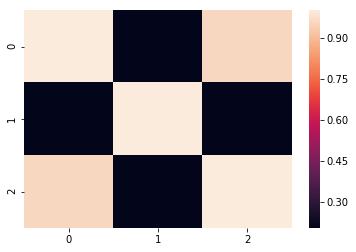

In [376]:
cuz = get_cosines(np.swapaxes(replicates[0].dg_M[np.asarray(inds_save[34], dtype = int)][:,:,[732,709, 738]], 1,2))
import seaborn as sns
%matplotlib inline
sns.heatmap(cuz)

In [377]:
reg_l1s = [0.01] #.0595 has 1
inds = [198, 486,  92, 176, 409, 299, 416,  42,  41, 286]
GGL5 = GradientGroupLasso(replicates[0].dg_M[inds][:,:,[732,709, 738]], replicates[0].df_M[inds], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()
outie.append(np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.))

0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 2

In [378]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)

(array([0, 2]),)

In [401]:
reg_l1s = [0.01] #.0595 has 1
inds = [299, 416,  42,  41, 286,198, 486,  92, 176, 409]
GGL5 = GradientGroupLasso(replicates[0].dg_M[inds][:,:,[732,709, 738]], replicates[0].df_M[inds], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()
outie.append(np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.))

0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 2

In [402]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)

(array([0, 2]),)

In [417]:
reg_l1s = [0.006] #.0595 has 1
inds = [409,299, 416,  42,  41, 286,198, 486]#,  92]#[299, 416,  42,  41, 286,198, 486,  92, 176, 409]
GGL5 = GradientGroupLasso(replicates[0].dg_M[inds][:,:,[732,709, 738]], replicates[0].df_M[inds], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()
outie.append(np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.))

0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 2

In [418]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)

(array([1, 2]),)

In [435]:
reg_l1s = [0.007] #.0595 has 1
inds = [409,486, 299, 416,  42]#,  41]#, 286]#,  92]#[299, 416,  42,  41, 286,198, 486,  92, 176, 409]
GGL5 = GradientGroupLasso(replicates[0].dg_M[inds][:,:,[732,709, 738]], replicates[0].df_M[inds], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()
outie.append(np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.))

0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 2

In [436]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)

(array([0, 2]),)

In [446]:
reg_l1s = [0.007] #.0595 has 1
inds = [409,486, 299, 416,  42]#,  41]#, 286]#,  92]#[299, 416,  42,  41, 286,198, 486,  92, 176, 409]
GGL5 = GradientGroupLasso(replicates[0].dg_M[inds][:,:,[732,709, 738]], replicates[0].df_M[inds], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()
outie.append(np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.))

0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 2

In [447]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)

(array([0, 2]),)

In [448]:
replicates[0].dg_M[inds][:,:,[732,709, 738]]

array([[[-0.0364615 ,  0.0192305 , -0.03978204],
        [ 0.01962066,  0.02360571,  0.01377407]],

       [[-0.03129303, -0.00830718,  0.0346483 ],
        [ 0.03065221, -0.02901298, -0.02595866]],

       [[ 0.03689532,  0.01184386, -0.04031281],
        [-0.01183912,  0.0220213 ,  0.00647676]],

       [[ 0.01548185, -0.04306037,  0.00597463],
        [-0.02729662,  0.00041666, -0.02931746]],

       [[-0.02747014, -0.02042506, -0.02103142],
        [-0.01171588, -0.0010931 , -0.00329088]]])

In [353]:
outie = []
for i in range(50):
    inds = random.sample(range(500), 5)
    reg_l1s = [0.002] #.0595 has 1
    GGL5 = GradientGroupLasso(replicates[0].dg_M[inds][:,:,[732,709, 738]], replicates[0].df_M[inds], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
    GGL5.fit()
    outie.append(np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.))

0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 2

414
lr 250.0
415
lr 250.0
416
lr 250.0
417
lr 250.0
418
lr 250.0
419
lr 250.0
420
lr 250.0
421
lr 250.0
422
lr 250.0
423
lr 250.0
424
lr 250.0
425
lr 250.0
426
lr 250.0
427
lr 250.0
428
lr 250.0
429
lr 250.0
430
lr 250.0
431
lr 250.0
432
lr 250.0
433
lr 250.0
434
lr 250.0
435
lr 250.0
436
lr 250.0
437
lr 250.0
438
lr 250.0
439
lr 250.0
440
lr 250.0
441
lr 250.0
442
lr 250.0
443
lr 250.0
444
lr 250.0
445
lr 250.0
446
lr 250.0
447
lr 250.0
448
lr 250.0
449
lr 250.0
450
lr 250.0
451
lr 250.0
452
lr 250.0
453
lr 250.0
454
lr 250.0
455
lr 250.0
456
lr 250.0
457
lr 250.0
458
lr 250.0
459
lr 250.0
460
lr 250.0
461
lr 250.0
462
lr 250.0
463
lr 250.0
464
lr 250.0
465
lr 250.0
466
lr 250.0
467
lr 250.0
468
lr 250.0
469
lr 250.0
470
lr 250.0
471
lr 250.0
472
lr 250.0
473
lr 250.0
lr 125.0
474
lr 125.0
475
lr 125.0
476
lr 125.0
477
lr 125.0
478
lr 125.0
479
lr 125.0
480
lr 125.0
481
lr 125.0
482
lr 125.0
483
lr 125.0
484
lr 125.0
485
lr 125.0
486
lr 125.0
487
lr 125.0
488
lr 125.0
489
lr 125.0
490

lr 250.0
429
lr 250.0
430
lr 250.0
431
lr 250.0
432
lr 250.0
433
lr 250.0
434
lr 250.0
435
lr 250.0
436
lr 250.0
437
lr 250.0
438
lr 250.0
439
lr 250.0
440
lr 250.0
441
lr 250.0
442
lr 250.0
443
lr 250.0
444
lr 250.0
445
lr 250.0
446
lr 250.0
447
lr 250.0
448
lr 250.0
449
lr 250.0
450
lr 250.0
451
lr 250.0
452
lr 250.0
453
lr 250.0
454
lr 250.0
455
lr 250.0
456
lr 250.0
457
lr 250.0
458
lr 250.0
459
lr 250.0
460
lr 250.0
461
lr 250.0
462
lr 250.0
463
lr 250.0
464
lr 250.0
465
lr 250.0
466
lr 250.0
467
lr 250.0
468
lr 250.0
469
lr 250.0
470
lr 250.0
471
lr 250.0
472
lr 250.0
473
lr 250.0
474
lr 250.0
475
lr 250.0
476
lr 250.0
477
lr 250.0
478
lr 250.0
479
lr 250.0
480
lr 250.0
481
lr 250.0
482
lr 250.0
483
lr 250.0
484
lr 250.0
485
lr 250.0
486
lr 250.0
487
lr 250.0
488
lr 250.0
489
lr 250.0
490
lr 250.0
491
lr 250.0
492
lr 250.0
493
lr 250.0
494
lr 250.0
495
lr 250.0
496
lr 250.0
497
lr 250.0
498
lr 250.0
499
lr 250.0
0
lr 1000.0
lr 500.0
1
lr 500.0
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 

lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 250.0
83
lr 250.0
84
lr 250.0
85
lr 250.0
86
lr 250.0
87
lr 250.0
88
lr 250.0
89
lr 250.0
90
lr 250.0
91
lr 250.0
92
lr 250.0
93
lr 250.0
94
lr 250.0
95
lr 250.0
96
lr 250.0
97
lr 250.0
98
lr 250.0
99
lr 250.0
100
lr 250.0
101
lr 250.0
102
lr 250.0
103
lr 250.0
104
lr 250.0
105
lr 250.0
106
lr 250.0
107
lr 250.0
108
lr 250.0
109
lr 250.0
110
lr 250.0
111
lr 250.0
112
lr 250.0
113
lr 250.0
114
lr 250.0
115
lr 250.0
116
lr 250.0
117
lr 250.0
118
lr 250.0
119
lr 250.0
120
lr 250.0
121
lr 250.0
122
lr 250.0
123
lr 250.0
124
lr 250.0
125
lr 250.0
126
lr 250.0
127
lr 250.0
128
lr 250.0
129
lr 250.0
130
lr 250.0
131
lr 250.0
132
lr 250.0
133
lr 250.0
134
lr 250.0
135
lr 250.0
136
lr 250.0
137
lr 250.0
138
lr 250.0
139
lr 250.0
140
lr 250.0
141
lr 250.0
142
lr 250.0
143
lr 250.0
144
lr 250.0
145
lr 250.0
146
lr 250.0
147
lr 250.0
148
lr 250.0
149
lr 250.0
150
lr 250.0
151
lr 250.0
152
lr 250.0
153
lr 250.0
154
lr 250.0
155
lr 250.0

lr 250.0
313
lr 250.0
314
lr 250.0
315
lr 250.0
316
lr 250.0
317
lr 250.0
318
lr 250.0
319
lr 250.0
320
lr 250.0
321
lr 250.0
322
lr 250.0
323
lr 250.0
324
lr 250.0
325
lr 250.0
326
lr 250.0
327
lr 250.0
328
lr 250.0
329
lr 250.0
330
lr 250.0
331
lr 250.0
332
lr 250.0
333
lr 250.0
334
lr 250.0
335
lr 250.0
336
lr 250.0
337
lr 250.0
338
lr 250.0
339
lr 250.0
340
lr 250.0
341
lr 250.0
342
lr 250.0
343
lr 250.0
344
lr 250.0
345
lr 250.0
346
lr 250.0
347
lr 250.0
348
lr 250.0
349
lr 250.0
350
lr 250.0
351
lr 250.0
352
lr 250.0
353
lr 250.0
354
lr 250.0
355
lr 250.0
356
lr 250.0
357
lr 250.0
358
lr 250.0
359
lr 250.0
360
lr 250.0
361
lr 250.0
362
lr 250.0
363
lr 250.0
364
lr 250.0
365
lr 250.0
366
lr 250.0
367
lr 250.0
368
lr 250.0
369
lr 250.0
370
lr 250.0
371
lr 250.0
372
lr 250.0
373
lr 250.0
374
lr 250.0
375
lr 250.0
376
lr 250.0
377
lr 250.0
378
lr 250.0
379
lr 250.0
380
lr 250.0
381
lr 250.0
382
lr 250.0
383
lr 250.0
384
lr 250.0
385
lr 250.0
386
lr 250.0
387
lr 250.0
388
lr 250.0
389

259
lr 250.0
260
lr 250.0
261
lr 250.0
262
lr 250.0
263
lr 250.0
264
lr 250.0
265
lr 250.0
266
lr 250.0
267
lr 250.0
268
lr 250.0
269
lr 250.0
270
lr 250.0
271
lr 250.0
272
lr 250.0
273
lr 250.0
274
lr 250.0
275
lr 250.0
276
lr 250.0
277
lr 250.0
278
lr 250.0
279
lr 250.0
280
lr 250.0
281
lr 250.0
282
lr 250.0
283
lr 250.0
284
lr 250.0
285
lr 250.0
286
lr 250.0
287
lr 250.0
288
lr 250.0
289
lr 250.0
290
lr 250.0
291
lr 250.0
292
lr 250.0
293
lr 250.0
294
lr 250.0
295
lr 250.0
296
lr 250.0
297
lr 250.0
298
lr 250.0
299
lr 250.0
300
lr 250.0
301
lr 250.0
302
lr 250.0
303
lr 250.0
304
lr 250.0
305
lr 250.0
306
lr 250.0
307
lr 250.0
308
lr 250.0
309
lr 250.0
310
lr 250.0
311
lr 250.0
312
lr 250.0
313
lr 250.0
314
lr 250.0
315
lr 250.0
316
lr 250.0
317
lr 250.0
318
lr 250.0
319
lr 250.0
320
lr 250.0
321
lr 250.0
322
lr 250.0
323
lr 250.0
324
lr 250.0
325
lr 250.0
326
lr 250.0
327
lr 250.0
328
lr 250.0
329
lr 250.0
330
lr 250.0
331
lr 250.0
332
lr 250.0
333
lr 250.0
334
lr 250.0
335
lr 250.0

lr 250.0
225
lr 250.0
226
lr 250.0
227
lr 250.0
228
lr 250.0
229
lr 250.0
230
lr 250.0
231
lr 250.0
232
lr 250.0
233
lr 250.0
234
lr 250.0
235
lr 250.0
236
lr 250.0
237
lr 250.0
238
lr 250.0
239
lr 250.0
240
lr 250.0
241
lr 250.0
242
lr 250.0
243
lr 250.0
244
lr 250.0
245
lr 250.0
246
lr 250.0
247
lr 250.0
248
lr 250.0
249
lr 250.0
250
lr 250.0
251
lr 250.0
252
lr 250.0
253
lr 250.0
254
lr 250.0
255
lr 250.0
256
lr 250.0
257
lr 250.0
258
lr 250.0
259
lr 250.0
260
lr 250.0
261
lr 250.0
262
lr 250.0
263
lr 250.0
264
lr 250.0
265
lr 250.0
266
lr 250.0
267
lr 250.0
268
lr 250.0
269
lr 250.0
270
lr 250.0
271
lr 250.0
272
lr 250.0
273
lr 250.0
274
lr 250.0
275
lr 250.0
276
lr 250.0
277
lr 250.0
278
lr 250.0
279
lr 250.0
280
lr 250.0
281
lr 250.0
282
lr 250.0
283
lr 250.0
284
lr 250.0
285
lr 250.0
286
lr 250.0
287
lr 250.0
288
lr 250.0
289
lr 250.0
290
lr 250.0
291
lr 250.0
292
lr 250.0
293
lr 250.0
294
lr 250.0
295
lr 250.0
296
lr 250.0
297
lr 250.0
298
lr 250.0
299
lr 250.0
300
lr 250.0
301

lr 250.0
397
lr 250.0
398
lr 250.0
399
lr 250.0
400
lr 250.0
401
lr 250.0
402
lr 250.0
403
lr 250.0
404
lr 250.0
405
lr 250.0
406
lr 250.0
407
lr 250.0
408
lr 250.0
409
lr 250.0
410
lr 250.0
411
lr 250.0
412
lr 250.0
413
lr 250.0
414
lr 250.0
415
lr 250.0
416
lr 250.0
417
lr 250.0
418
lr 250.0
419
lr 250.0
420
lr 250.0
421
lr 250.0
422
lr 250.0
423
lr 250.0
424
lr 250.0
425
lr 250.0
426
lr 250.0
427
lr 250.0
428
lr 250.0
429
lr 250.0
430
lr 250.0
431
lr 250.0
432
lr 250.0
433
lr 250.0
434
lr 250.0
435
lr 250.0
436
lr 250.0
437
lr 250.0
438
lr 250.0
439
lr 250.0
440
lr 250.0
441
lr 250.0
442
lr 250.0
443
lr 250.0
444
lr 250.0
445
lr 250.0
446
lr 250.0
447
lr 250.0
448
lr 250.0
449
lr 250.0
450
lr 250.0
451
lr 250.0
452
lr 250.0
453
lr 250.0
454
lr 250.0
455
lr 250.0
456
lr 250.0
457
lr 250.0
458
lr 250.0
459
lr 250.0
460
lr 250.0
461
lr 250.0
462
lr 250.0
463
lr 250.0
464
lr 250.0
465
lr 250.0
466
lr 250.0
467
lr 250.0
468
lr 250.0
469
lr 250.0
470
lr 250.0
471
lr 250.0
472
lr 250.0
473

lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 250.0
83
lr 250.0
84
lr 250.0
85
lr 250.0
86
lr 250.0
87
lr 250.0
88
lr 250.0
89
lr 250.0
90
lr 250.0
91
lr 250.0
92
lr 250.0
93
lr 250.0
94
lr 250.0
95
lr 250.0
96
lr 250.0
97
lr 250.0
98
lr 250.0
99
lr 250.0
100
lr 250.0
101
lr 250.0
102
lr 250.0
103
lr 250.0
104
lr 250.0
105
lr 250.0
converged 0.002
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0


16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 250.0
83
lr 250.0
84
lr 250.0
85
lr 250.0
86
lr 250.0
87
lr 250.0
88
lr 250.0
89
lr 250.0
90
lr 250.0
91
lr 250.0
92
lr 250.0
93
lr 250.0
94
lr 250.0
95
lr 250.0
96
lr 250.0
97
lr 250.0
98
lr 250.0
99
l

175
lr 250.0
176
lr 250.0
177
lr 250.0
178
lr 250.0
179
lr 250.0
180
lr 250.0
181
lr 250.0
182
lr 250.0
183
lr 250.0
184
lr 250.0
185
lr 250.0
186
lr 250.0
187
lr 250.0
188
lr 250.0
189
lr 250.0
190
lr 250.0
191
lr 250.0
192
lr 250.0
193
lr 250.0
194
lr 250.0
195
lr 250.0
196
lr 250.0
197
lr 250.0
198
lr 250.0
199
lr 250.0
200
lr 250.0
201
lr 250.0
202
lr 250.0
203
lr 250.0
204
lr 250.0
205
lr 250.0
206
lr 250.0
207
lr 250.0
208
lr 250.0
converged 0.002
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr

lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 250.0
52
lr 250.0
53
lr 250.0
54
lr 250.0
55
lr 250.0
56
lr 250.0
57
lr 250.0
58
lr 250.0
59
lr 250.0
60
lr 250.0
61
lr 250.0
62
lr 250.0
63
lr 250.0
64
lr 250.0
65
lr 250.0
66
lr 250.0
67
lr 250.0
68
lr 250.0
69
lr 250.0
70
lr 250.0
71
lr 250.0
72
lr 250.0
73
lr 250.0
74
lr 250.0
75
lr 250.0
76
lr 250.0
77
lr 250.0
78
lr 250.0
79
lr 250.0
80
lr 250.0
81
lr 250.0
82
lr 250.0
83
lr 250.0
84
lr 250.0
85
lr 250.0
86
lr 250.0
87
lr 250.0
88
lr 250.0
89
lr 250.0
90
lr 250.0
91
lr 250.0
92
lr 250.0
93
lr 250.0
94
lr 250.0
95
lr 250.0
96
lr 250.0
97
lr 250.0
98
lr 250.0
99
lr 250.0
100
lr 

lr 250.0
185
lr 250.0
186
lr 250.0
187
lr 250.0
188
lr 250.0
189
lr 250.0
190
lr 250.0
191
lr 250.0
192
lr 250.0
193
lr 250.0
194
lr 250.0
195
lr 250.0
196
lr 250.0
197
lr 250.0
198
lr 250.0
199
lr 250.0
200
lr 250.0
201
lr 250.0
202
lr 250.0
203
lr 250.0
204
lr 250.0
205
lr 250.0
206
lr 250.0
207
lr 250.0
208
lr 250.0
209
lr 250.0
210
lr 250.0
211
lr 250.0
212
lr 250.0
213
lr 250.0
214
lr 250.0
215
lr 250.0
216
lr 250.0
217
lr 250.0
218
lr 250.0
219
lr 250.0
220
lr 250.0
221
lr 250.0
222
lr 250.0
223
lr 250.0
224
lr 250.0
225
lr 250.0
226
lr 250.0
227
lr 250.0
228
lr 250.0
229
lr 250.0
230
lr 250.0
231
lr 250.0
232
lr 250.0
233
lr 250.0
234
lr 250.0
235
lr 250.0
236
lr 250.0
237
lr 250.0
238
lr 250.0
239
lr 250.0
240
lr 250.0
241
lr 250.0
242
lr 250.0
243
lr 250.0
244
lr 250.0
245
lr 250.0
246
lr 250.0
247
lr 250.0
248
lr 250.0
249
lr 250.0
250
lr 250.0
251
lr 250.0
252
lr 250.0
253
lr 250.0
254
lr 250.0
255
lr 250.0
256
lr 250.0
257
lr 250.0
258
lr 250.0
259
lr 250.0
260
lr 250.0
261

lr 250.0
254
lr 250.0
255
lr 250.0
256
lr 250.0
257
lr 250.0
258
lr 250.0
259
lr 250.0
260
lr 250.0
261
lr 250.0
262
lr 250.0
263
lr 250.0
264
lr 250.0
265
lr 250.0
266
lr 250.0
267
lr 250.0
268
lr 250.0
269
lr 250.0
270
lr 250.0
271
lr 250.0
272
lr 250.0
273
lr 250.0
274
lr 250.0
275
lr 250.0
276
lr 250.0
277
lr 250.0
278
lr 250.0
279
lr 250.0
280
lr 250.0
281
lr 250.0
282
lr 250.0
283
lr 250.0
284
lr 250.0
285
lr 250.0
286
lr 250.0
287
lr 250.0
288
lr 250.0
289
lr 250.0
290
lr 250.0
291
lr 250.0
292
lr 250.0
293
lr 250.0
294
lr 250.0
295
lr 250.0
296
lr 250.0
297
lr 250.0
298
lr 250.0
299
lr 250.0
300
lr 250.0
301
lr 250.0
302
lr 250.0
303
lr 250.0
304
lr 250.0
305
lr 250.0
306
lr 250.0
307
lr 250.0
308
lr 250.0
309
lr 250.0
310
lr 250.0
311
lr 250.0
312
lr 250.0
313
lr 250.0
314
lr 250.0
315
lr 250.0
316
lr 250.0
317
lr 250.0
318
lr 250.0
319
lr 250.0
320
lr 250.0
321
lr 250.0
322
lr 250.0
323
lr 250.0
324
lr 250.0
325
lr 250.0
326
lr 250.0
327
lr 250.0
328
lr 250.0
329
lr 250.0
330

241
lr 250.0
242
lr 250.0
243
lr 250.0
244
lr 250.0
245
lr 250.0
246
lr 250.0
247
lr 250.0
248
lr 250.0
249
lr 250.0
250
lr 250.0
251
lr 250.0
252
lr 250.0
253
lr 250.0
254
lr 250.0
255
lr 250.0
256
lr 250.0
257
lr 250.0
258
lr 250.0
259
lr 250.0
260
lr 250.0
261
lr 250.0
262
lr 250.0
263
lr 250.0
264
lr 250.0
265
lr 250.0
266
lr 250.0
267
lr 250.0
268
lr 250.0
269
lr 250.0
270
lr 250.0
271
lr 250.0
272
lr 250.0
273
lr 250.0
274
lr 250.0
275
lr 250.0
276
lr 250.0
277
lr 250.0
278
lr 250.0
279
lr 250.0
280
lr 250.0
281
lr 250.0
282
lr 250.0
283
lr 250.0
284
lr 250.0
285
lr 250.0
286
lr 250.0
287
lr 250.0
288
lr 250.0
289
lr 250.0
290
lr 250.0
291
lr 250.0
292
lr 250.0
293
lr 250.0
294
lr 250.0
295
lr 250.0
296
lr 250.0
297
lr 250.0
298
lr 250.0
299
lr 250.0
300
lr 250.0
301
lr 250.0
302
lr 250.0
303
lr 250.0
304
lr 250.0
305
lr 250.0
306
lr 250.0
307
lr 250.0
308
lr 250.0
309
lr 250.0
310
lr 250.0
311
lr 250.0
312
lr 250.0
313
lr 250.0
314
lr 250.0
315
lr 250.0
316
lr 250.0
317
lr 250.0

289
lr 250.0
290
lr 250.0
291
lr 250.0
292
lr 250.0
293
lr 250.0
294
lr 250.0
295
lr 250.0
296
lr 250.0
297
lr 250.0
298
lr 250.0
299
lr 250.0
300
lr 250.0
301
lr 250.0
302
lr 250.0
303
lr 250.0
304
lr 250.0
305
lr 250.0
306
lr 250.0
307
lr 250.0
308
lr 250.0
309
lr 250.0
310
lr 250.0
311
lr 250.0
312
lr 250.0
313
lr 250.0
314
lr 250.0
315
lr 250.0
316
lr 250.0
317
lr 250.0
318
lr 250.0
319
lr 250.0
320
lr 250.0
321
lr 250.0
322
lr 250.0
323
lr 250.0
324
lr 250.0
325
lr 250.0
326
lr 250.0
327
lr 250.0
328
lr 250.0
329
lr 250.0
330
lr 250.0
331
lr 250.0
332
lr 250.0
333
lr 250.0
334
lr 250.0
335
lr 250.0
336
lr 250.0
337
lr 250.0
338
lr 250.0
339
lr 250.0
340
lr 250.0
341
lr 250.0
342
lr 250.0
343
lr 250.0
344
lr 250.0
345
lr 250.0
346
lr 250.0
347
lr 250.0
348
lr 250.0
349
lr 250.0
350
lr 250.0
351
lr 250.0
352
lr 250.0
353
lr 250.0
354
lr 250.0
355
lr 250.0
356
lr 250.0
357
lr 250.0
358
lr 250.0
359
lr 250.0
360
lr 250.0
361
lr 250.0
362
lr 250.0
363
lr 250.0
364
lr 250.0
365
lr 250.0

466
lr 250.0
467
lr 250.0
468
lr 250.0
469
lr 250.0
470
lr 250.0
471
lr 250.0
472
lr 250.0
473
lr 250.0
474
lr 250.0
475
lr 250.0
476
lr 250.0
477
lr 250.0
478
lr 250.0
479
lr 250.0
480
lr 250.0
481
lr 250.0
482
lr 250.0
483
lr 250.0
484
lr 250.0
485
lr 250.0
486
lr 250.0
487
lr 250.0
488
lr 250.0
489
lr 250.0
490
lr 250.0
491
lr 250.0
492
lr 250.0
493
lr 250.0
494
lr 250.0
495
lr 250.0
496
lr 250.0
497
lr 250.0
498
lr 250.0
499
lr 250.0
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250

lr 250.0
472
lr 250.0
473
lr 250.0
474
lr 250.0
475
lr 250.0
476
lr 250.0
477
lr 250.0
478
lr 250.0
479
lr 250.0
480
lr 250.0
481
lr 250.0
482
lr 250.0
483
lr 250.0
484
lr 250.0
485
lr 250.0
486
lr 250.0
487
lr 250.0
488
lr 250.0
489
lr 250.0
490
lr 250.0
491
lr 250.0
492
lr 250.0
493
lr 250.0
494
lr 250.0
495
lr 250.0
496
lr 250.0
497
lr 250.0
498
lr 250.0
499
lr 250.0
0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
3
lr 250.0
4
lr 250.0
5
lr 250.0
6
lr 250.0
7
lr 250.0
8
lr 250.0
9
lr 250.0
10
lr 250.0
11
lr 250.0
12
lr 250.0
13
lr 250.0
14
lr 250.0
15
lr 250.0
16
lr 250.0
17
lr 250.0
18
lr 250.0
19
lr 250.0
20
lr 250.0
21
lr 250.0
22
lr 250.0
23
lr 250.0
24
lr 250.0
25
lr 250.0
26
lr 250.0
27
lr 250.0
28
lr 250.0
29
lr 250.0
30
lr 250.0
31
lr 250.0
32
lr 250.0
33
lr 250.0
34
lr 250.0
35
lr 250.0
36
lr 250.0
37
lr 250.0
38
lr 250.0
39
lr 250.0
40
lr 250.0
41
lr 250.0
42
lr 250.0
43
lr 250.0
44
lr 250.0
45
lr 250.0
46
lr 250.0
47
lr 250.0
48
lr 250.0
49
lr 250.0
50
lr 250.0
51
lr 

In [354]:
outie

[(array([0, 1]),),
 (array([1, 2]),),
 (array([1, 2]),),
 (array([0, 1, 2]),),
 (array([0, 1]),),
 (array([1, 2]),),
 (array([0, 1, 2]),),
 (array([0, 1]),),
 (array([0, 1]),),
 (array([1, 2]),),
 (array([0, 1]),),
 (array([0, 1]),),
 (array([1, 2]),),
 (array([1, 2]),),
 (array([1, 2]),),
 (array([0, 1]),),
 (array([0, 1, 2]),),
 (array([1, 2]),),
 (array([1, 2]),),
 (array([0, 1, 2]),),
 (array([0, 1]),),
 (array([1, 2]),),
 (array([0, 1, 2]),),
 (array([0, 1, 2]),),
 (array([0, 1, 2]),),
 (array([0, 1]),),
 (array([1, 2]),),
 (array([1, 2]),),
 (array([0, 1, 2]),),
 (array([0, 1, 2]),),
 (array([1, 2]),),
 (array([0, 1]),),
 (array([1, 2]),),
 (array([0, 1, 2]),),
 (array([0, 1, 2]),),
 (array([1, 2]),),
 (array([0, 1, 2]),),
 (array([1, 2]),),
 (array([0, 1, 2]),),
 (array([1, 2]),),
 (array([1, 2]),),
 (array([0, 1, 2]),),
 (array([0, 1]),),
 (array([0, 1, 2]),),
 (array([1, 2]),),
 (array([0, 1, 2]),),
 (array([1, 2]),),
 (array([0, 1]),),
 (array([0, 1, 2]),),
 (array([0, 1, 2])

In [335]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([0, 1, 2])

In [188]:
np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [160]:
reg_l1s = [0.0587054887257315343] #.0595 has 1
GGL5 = GradientGroupLasso(replicates[0].dg_M[:315], replicates[0].df_M[:315], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000.0
lr 500.0
lr 250.0
lr 125.0
1
lr 125.0
2
lr 125.0
3
lr 125.0
4
lr 125.0
5
lr 125.0
6
lr 125.0
7
lr 125.0
8
lr 125.0
9
lr 125.0
10
lr 125.0
11
lr 125.0
12
lr 125.0
13
lr 125.0
14
lr 125.0
15
lr 125.0
16
lr 125.0
17
lr 125.0
18
lr 125.0
19
lr 125.0
20
lr 125.0
21
lr 125.0
22
lr 125.0
23
lr 125.0
24
lr 125.0
25
lr 125.0
26
lr 125.0
27
lr 125.0
28
lr 125.0
29
lr 125.0
30
lr 125.0
31
lr 125.0
32
lr 125.0
33
lr 125.0
34
lr 125.0
35
lr 125.0
36
lr 125.0
37
lr 125.0
38
lr 125.0
39
lr 125.0
40
lr 125.0
41
lr 125.0
42
lr 125.0
43
lr 125.0
44
lr 125.0
45
lr 125.0
46
lr 125.0
47
lr 125.0
48
lr 125.0
49
lr 125.0
50
lr 125.0
51
lr 125.0
52
lr 125.0
53
lr 125.0
54
lr 125.0
55
lr 125.0
56
lr 125.0
57
lr 125.0
58
lr 125.0
59
lr 125.0
60
lr 125.0
61
lr 125.0
62
lr 125.0
63
lr 125.0
64
lr 125.0
65
lr 125.0
66
lr 125.0
67
lr 125.0
68
lr 125.0
69
lr 125.0
70
lr 125.0
71
lr 125.0
72
lr 125.0
73
lr 125.0
74
lr 125.0
75
lr 125.0
76
lr 125.0
77
lr 125.0
78
lr 125.0
79
lr 125.0
80
lr 125.0
81
lr 125.

In [161]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([709, 732])

In [162]:
reg_l1s = [0.0587054887257315343] #.0595 has 1
GGL5 = GradientGroupLasso(replicates[0].dg_M[:317], replicates[0].df_M[:317], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000.0
lr 500.0
lr 250.0
lr 125.0
1
lr 125.0
2
lr 125.0
3
lr 125.0
4
lr 125.0
5
lr 125.0
6
lr 125.0
7
lr 125.0
8
lr 125.0
9
lr 125.0
10
lr 125.0
11
lr 125.0
12
lr 125.0
13
lr 125.0
14
lr 125.0
15
lr 125.0
16
lr 125.0
17
lr 125.0
18
lr 125.0
19
lr 125.0
20
lr 125.0
21
lr 125.0
22
lr 125.0
23
lr 125.0
24
lr 125.0
25
lr 125.0
26
lr 125.0
27
lr 125.0
28
lr 125.0
29
lr 125.0
30
lr 125.0
31
lr 125.0
32
lr 125.0
33
lr 125.0
34
lr 125.0
35
lr 125.0
36
lr 125.0
37
lr 125.0
38
lr 125.0
39
lr 125.0
40
lr 125.0
41
lr 125.0
42
lr 125.0
43
lr 125.0
44
lr 125.0
45
lr 125.0
46
lr 125.0
47
lr 125.0
48
lr 125.0
49
lr 125.0
50
lr 125.0
51
lr 125.0
52
lr 125.0
53
lr 125.0
54
lr 125.0
55
lr 125.0
56
lr 125.0
57
lr 125.0
58
lr 125.0
59
lr 125.0
60
lr 125.0
61
lr 125.0
62
lr 125.0
63
lr 125.0
64
lr 125.0
65
lr 125.0
66
lr 125.0
67
lr 125.0
68
lr 125.0
69
lr 125.0
70
lr 125.0
71
lr 125.0
72
lr 125.0
73
lr 125.0
74
lr 125.0
75
lr 125.0
76
lr 125.0
77
lr 125.0
78
lr 125.0
79
lr 125.0
80
lr 125.0
81
lr 125.

In [164]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([709, 732])

In [167]:
reg_l1s = [0.0590054887257315343] #.0595 has 1
GGL5 = GradientGroupLasso(replicates[0].dg_M[:318], replicates[0].df_M[:318], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000.0
lr 500.0
lr 250.0
lr 125.0
1
lr 125.0
2
lr 125.0
3
lr 125.0
4
lr 125.0
5
lr 125.0
6
lr 125.0
7
lr 125.0
8
lr 125.0
9
lr 125.0
10
lr 125.0
11
lr 125.0
12
lr 125.0
13
lr 125.0
14
lr 125.0
15
lr 125.0
16
lr 125.0
17
lr 125.0
18
lr 125.0
19
lr 125.0
20
lr 125.0
21
lr 125.0
22
lr 125.0
23
lr 125.0
24
lr 125.0
25
lr 125.0
26
lr 125.0
27
lr 125.0
28
lr 125.0
29
lr 125.0
30
lr 125.0
31
lr 125.0
32
lr 125.0
33
lr 125.0
34
lr 125.0
35
lr 125.0
36
lr 125.0
37
lr 125.0
38
lr 125.0
39
lr 125.0
40
lr 125.0
41
lr 125.0
42
lr 125.0
43
lr 125.0
44
lr 125.0
45
lr 125.0
46
lr 125.0
47
lr 125.0
48
lr 125.0
49
lr 125.0
50
lr 125.0
51
lr 125.0
52
lr 125.0
53
lr 125.0
54
lr 125.0
55
lr 125.0
56
lr 125.0
57
lr 125.0
58
lr 125.0
59
lr 125.0
60
lr 125.0
61
lr 125.0
62
lr 125.0
63
lr 125.0
64
lr 125.0
65
lr 125.0
66
lr 125.0
67
lr 125.0
68
lr 125.0
69
lr 125.0
70
lr 125.0
71
lr 125.0
72
lr 125.0
73
lr 125.0
74
lr 125.0
75
lr 125.0
76
lr 125.0
77
lr 125.0
78
lr 125.0
79
lr 125.0
80
lr 125.0
81
lr 125.

In [168]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([709, 732])

In [171]:
reg_l1s = [0.0595054887257315343] #.0595 has 1
GGL5 = GradientGroupLasso(replicates[0].dg_M[:319], replicates[0].df_M[:319], reg_l1s, reg_l2, max_iter,learning_rate, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000.0
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
lr 125.0
3
lr 125.0
4
lr 125.0
5
lr 125.0
6
lr 125.0
7
lr 125.0
8
lr 125.0
9
lr 125.0
10
lr 125.0
11
lr 125.0
12
lr 125.0
13
lr 125.0
14
lr 125.0
15
lr 125.0
16
lr 125.0
17
lr 125.0
18
lr 125.0
19
lr 125.0
20
lr 125.0
21
lr 125.0
22
lr 125.0
23
lr 125.0
24
lr 125.0
25
lr 125.0
26
lr 125.0
27
lr 125.0
28
lr 125.0
29
lr 125.0
30
lr 125.0
31
lr 125.0
32
lr 125.0
33
lr 125.0
34
lr 125.0
35
lr 125.0
36
lr 125.0
37
lr 125.0
38
lr 125.0
39
lr 125.0
40
lr 125.0
41
lr 125.0
42
lr 125.0
43
lr 125.0
44
lr 125.0
45
lr 125.0
46
lr 125.0
47
lr 125.0
48
lr 125.0
49
lr 125.0
50
lr 125.0
51
lr 125.0
52
lr 125.0
53
lr 125.0
54
lr 125.0
55
lr 125.0
56
lr 125.0
57
lr 125.0
58
lr 125.0
59
lr 125.0
60
lr 125.0
61
lr 125.0
62
lr 125.0
63
lr 125.0
64
lr 125.0
65
lr 125.0
66
lr 125.0
67
lr 125.0
68
lr 125.0
69
lr 125.0
70
lr 125.0
71
lr 125.0
72
lr 125.0
73
lr 125.0
74
lr 125.0
75
lr 125.0
76
lr 125.0
77
lr 125.0
78
lr 125.0
79
lr 125.0
80
lr 125.0
81
lr 125.

In [172]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([732, 738])

In [175]:
replicates[0].dg_M[318][:,[709,732,738]]

array([[ 0.02811198,  0.02225314,  0.02943282],
       [ 0.02181535, -0.0169873 , -0.01505417]])

In [177]:
replicates[0].df_M[318][:,:]

array([[-0.10518124,  0.00074844, -0.05275658],
       [ 0.02339907, -0.00304391, -0.00897657]])

In [179]:
replicates[0].dg_M[317][:,[709,732,738]]

array([[-0.01110193,  0.02459965,  0.02920139],
       [ 0.02629801,  0.03458096,  0.03881481]])

In [178]:
replicates[0].df_M[317][:,:]

array([[-0.00702676, -0.01784903, -0.01174566],
       [-0.03303002, -0.08806783, -0.05380695]])

In [180]:
replicates[0].df_M[316][:,:]

array([[ 0.11472144, -0.00538254, -0.0229662 ],
       [ 0.00040445,  0.00021645,  0.01471576]])

In [181]:
replicates[0].dg_M[316][:,[709,732,738]]

array([[-0.02304247, -0.02540741, -0.02141443],
       [ 0.02862757, -0.01673579, -0.02356074]])

In [182]:
reg_l1s = [0.0595054887257315343] #.0595 has 1
GGL5 = GradientGroupLasso(replicates[0].dg_M[:319], replicates[0].df_M[:319], reg_l1s, reg_l2, 5000,1000, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000
lr 500.0
lr 250.0
1
lr 250.0
2
lr 250.0
lr 125.0
3
lr 125.0
4
lr 125.0
5
lr 125.0
6
lr 125.0
7
lr 125.0
8
lr 125.0
9
lr 125.0
10
lr 125.0
11
lr 125.0
12
lr 125.0
13
lr 125.0
14
lr 125.0
15
lr 125.0
16
lr 125.0
17
lr 125.0
18
lr 125.0
19
lr 125.0
20
lr 125.0
21
lr 125.0
22
lr 125.0
23
lr 125.0
24
lr 125.0
25
lr 125.0
26
lr 125.0
27
lr 125.0
28
lr 125.0
29
lr 125.0
30
lr 125.0
31
lr 125.0
32
lr 125.0
33
lr 125.0
34
lr 125.0
35
lr 125.0
36
lr 125.0
37
lr 125.0
38
lr 125.0
39
lr 125.0
40
lr 125.0
41
lr 125.0
42
lr 125.0
43
lr 125.0
44
lr 125.0
45
lr 125.0
46
lr 125.0
47
lr 125.0
48
lr 125.0
49
lr 125.0
50
lr 125.0
51
lr 125.0
52
lr 125.0
53
lr 125.0
54
lr 125.0
55
lr 125.0
56
lr 125.0
57
lr 125.0
58
lr 125.0
59
lr 125.0
60
lr 125.0
61
lr 125.0
62
lr 125.0
63
lr 125.0
64
lr 125.0
65
lr 125.0
66
lr 125.0
67
lr 125.0
68
lr 125.0
69
lr 125.0
70
lr 125.0
71
lr 125.0
72
lr 125.0
73
lr 125.0
74
lr 125.0
75
lr 125.0
76
lr 125.0
77
lr 125.0
78
lr 125.0
79
lr 125.0
80
lr 125.0
81
lr 125.0


In [183]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([732, 738])

In [185]:
reg_l1s = [0.000595054887257315343] #.0595 has 1
GGL5 = GradientGroupLasso(replicates[0].dg_M[318:319], replicates[0].df_M[318:319], reg_l1s, reg_l2, 500,1000, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000
lr 500.0
lr 250.0
lr 125.0
lr 62.5
lr 31.25
lr 15.625
lr 7.8125
lr 3.90625
1
lr 3.90625
2
lr 3.90625
3
lr 3.90625
4
lr 3.90625
5
lr 3.90625
6
lr 3.90625
7
lr 3.90625
8
lr 3.90625
9
lr 3.90625
10
lr 3.90625
11
lr 3.90625
12
lr 3.90625
13
lr 3.90625
14
lr 3.90625
15
lr 3.90625
16
lr 3.90625
17
lr 3.90625
18
lr 3.90625
19
lr 3.90625
20
lr 3.90625
21
lr 3.90625
22
lr 3.90625
23
lr 3.90625
24
lr 3.90625
25
lr 3.90625
26
lr 3.90625
27
lr 3.90625
28
lr 3.90625
29
lr 3.90625
30
lr 3.90625
31
lr 3.90625
32
lr 3.90625
33
lr 3.90625
34
lr 3.90625
35
lr 3.90625
36
lr 3.90625
37
lr 3.90625
38
lr 3.90625
39
lr 3.90625
40
lr 3.90625
41
lr 3.90625
42
lr 3.90625
43
lr 3.90625
44
lr 3.90625
45
lr 3.90625
46
lr 3.90625
47
lr 3.90625
48
lr 3.90625
49
lr 3.90625
50
lr 3.90625
51
lr 3.90625
52
lr 3.90625
53
lr 3.90625
54
lr 3.90625
55
lr 3.90625
56
lr 3.90625
57
lr 3.90625
58
lr 3.90625
59
lr 3.90625
60
lr 3.90625
61
lr 3.90625
62
lr 3.90625
63
lr 3.90625
64
lr 3.90625
65
lr 3.90625
66
lr 3.90625


In [186]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([697, 738])

In [226]:
reg_l1s = [0.00395054887257315343] #.1495 has 1
GGL5 = GradientGroupLasso(replicates[0].dg_M[[1,318]], replicates[0].df_M[[1,318]], reg_l1s, reg_l2, 500,1000, tol, beta0_npm= None)
GGL5.fit()

0
lr 1000
lr 500.0
lr 250.0
lr 125.0
lr 62.5
lr 31.25
1
lr 31.25
2
lr 31.25
3
lr 31.25
4
lr 31.25
5
lr 31.25
6
lr 31.25
7
lr 31.25
8
lr 31.25
9
lr 31.25
10
lr 31.25
11
lr 31.25
12
lr 31.25
13
lr 31.25
14
lr 31.25
15
lr 31.25
16
lr 31.25
17
lr 31.25
18
lr 31.25
19
lr 31.25
20
lr 31.25
21
lr 31.25
22
lr 31.25
23
lr 31.25
24
lr 31.25
25
lr 31.25
26
lr 31.25
27
lr 31.25
28
lr 31.25
29
lr 31.25
30
lr 31.25
31
lr 31.25
32
lr 31.25
33
lr 31.25
34
lr 31.25
35
lr 31.25
36
lr 31.25
37
lr 31.25
38
lr 31.25
39
lr 31.25
40
lr 31.25
41
lr 31.25
42
lr 31.25
43
lr 31.25
44
lr 31.25
45
lr 31.25
46
lr 31.25
47
lr 31.25
48
lr 31.25
49
lr 31.25
50
lr 31.25
51
lr 31.25
52
lr 31.25
53
lr 31.25
54
lr 31.25
55
lr 31.25
56
lr 31.25
57
lr 31.25
58
lr 31.25
59
lr 31.25
60
lr 31.25
61
lr 31.25
62
lr 31.25
63
lr 31.25
64
lr 31.25
65
lr 31.25
66
lr 31.25
67
lr 31.25
68
lr 31.25
69
lr 31.25
70
lr 31.25
71
lr 31.25
72
lr 31.25
73
lr 31.25
74
lr 31.25
75
lr 31.25
76
lr 31.25
77
lr 31.25
78
lr 31.25
79
lr 31.25
80
lr 3

In [227]:
np.where(np.linalg.norm(np.linalg.norm(GGL5.fit_[-1]['beta'], axis=2), axis=0) !=0.)[0]

array([697, 739])

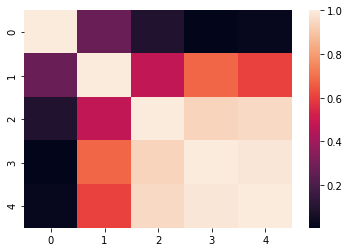

In [229]:
cuz = get_cosines(np.swapaxes(replicates[0].dg_M[[1,318]][:,:,[680, 697,732, 738,739]], 1,2))
import seaborn as sns
%matplotlib inline
sns.heatmap(cuz)

In [206]:
replicates[0].dg_M[[0,318]][:,:,[680, 697, 738]]

array([[[-0.03273597,  0.02744623,  0.02545498],
        [-0.0038656 ,  0.02681833, -0.01758954]],

       [[-0.01090815,  0.03944949,  0.02943282],
        [-0.02469582,  0.01479451, -0.01505417]]])

In [207]:
replicates[0].df_M[[0,318]]

array([[[ 0.00296332, -0.1465049 ,  0.06942266],
        [ 0.00085125,  0.00783811,  0.00933642]],

       [[-0.10518124,  0.00074844, -0.05275658],
        [ 0.02339907, -0.00304391, -0.00897657]]])

array([680, 697, 738])

In [ ]:
Adding the 697,738 point to 709 732 gives you the 732 738 point set

Once again, the convex penalized sum function is creating a problem. In fact, we have that
\begin{align*}
l(y - x_{1,2} \hatb) + p(\hat b_{732,738}) < l(y - x_{1,2} b) + p(\hat b_{697,738}), l(y - x_{1,2}  \hat b) + p( \hatb_{709,732})
\end{align*}

although

\begin{align*}
l(y - x_{1} \hat b) + p(\hat b_{697,738}) < l(y - x_{1} \hat b) + p(\hat b_{732,738}) \\
l(y - x_{2} \hat b1) + p(\hat b_{709,732}) < l(y - x_{2} \hat b) + p(\hat b_{732,738}) \\
p(b_{12,697,738}*) < p(12,b_{732,738}*) \\ 
p(b_{12,709,732}*) < p(12,b_{732,738}*)
\end{align*}

#what would I guess the outcome would be????

Question: does p(b_{1,697,738}*) < p(1, b_{732,738}*) , p(b_{2, 697,738}*) < p(2, b_{732,738}*) imply p( b_{12,697,738}*) < p(b_{12, 732,738}*) ??

p( b_{12,732,738}*)  = b_{12,732}* +  b_{12,738}* = (b_{1,732} + b_{2,732} )* + (b_{1,738} + b_{2,738})* > 
p(1, b_{732,738}*) + p(2, b_{732,738}*) 

would we expect colinearity to not be a problem away from a set of singular size?

We would think a lower-dimensional solution would be preferable to selecting a highly similar second gradient.  However, in fact a non-convex penalty can impose sparsity when the standard penalty does not.  The gradient of the l2 is basically linear anyway.

In [ ]:

\|\beta_j\|_{2,1} is creating a problem



Is the group lasso penalty of the least squares solution the right penalty? Recall that the group lasso penalty is 
\begin{align*}
\|\beta\|_{1,2} = \\sum_{j = 1}^p \|\beta_j\|_2
\end{align*}
With proper normalization, in the tangent space case, we have that 
\begin{align*}
\|\beta^{OLS}\|_{1,2} = d\sqrt{n}. 
\end{align*}
This type of result is a certificate.  A best answer satisfies this quality, or if we have an answer with this quality, it is the best.  Why is it best?

Suppose we have $d$ non-orthogonal unit vectors $V = v_1 \dotsc v_d$. Then $\beta_{OLS} = U V^{-1} $, and $\|\beta_{OLS}\|_{1,2} = \|U V^{-1}\|_{1,2} = \|V^{-1}\|_{1,2}$ by the argument in the paper.  Thus, if $V = I_d$, $\|\beta_{OLS}\|_{1,2} = d$. Moreover, $\|\beta_{OLS, 1:n}\|_{1,2} = \sum \|\beta_{OLS, 1:n}\|_2 = \sum \sqrt{\sum} $

We can extend these properties to n points.  In this case, we are rotating with a block matrices 
\begin{align*}
\begin{bmatrix}
U_1 & 0  & 0\\
0 & \dotsc & 0 \\
0 & 0 & U_d
\end{bmatrix}
\end{align*}
which is unitary since $U_i = U_i^{-1} \implies U_{1:n} = U_{1:n}^{-1}$ and taking the norm $\|\beta_{OLS,1:n}\|_{1,2} = \|U_{1:n} V_{1:n}^{-1}\|_{1,2} = \dotsc $.  Let's show that this goes up:

Suppose $V$ is equal to the identity expect for one column.  Assume $\beta_{OLS}$ for these columns is the identity.  A big vector elsewhere would be good, bus oscillation is bad.

Minimization takes place in the general linear group quotiented by the special orthogonal group

The proof goes like this: oscillating is worse than non oscillating, and orthogonal is better than non-orthogonal.

[comment]: <> (group $\mathbb R^d \times S(d)$,   #which is additive group $\mathbb R^d$ producted with the symmetric group $S_d$.  #This is because  permutations)

[comment]: <> (This is not the same as noting that entire data is is a single data point in the space of data sets, since the matrix is block diagonal.)

It is different than the convex certificate, which is
\begin{align*}
X_i^T(I_d - X_i B_i) = \frac{\lambda}{\sqrt{nd} }
\begin{cases}{
\frac{\beta_i}{\|\beta\|_i}}  \text{ if } \beta_i \neq 0  \\
z_j \text{ otherwise}
\end{cases} \forall i
\end{align*}
where $z_j$ is an arbitrary vector in $\mathbb R^{dn}$ with $\|z_j \|_2 < 1$.

We briefly derive this condition below.  The KKT condition is 
\begin{align*}
\nabla \frac{1}{2} \sum_{i = 1}^n \|I_d - X_i B_i \|_2^2  = - 
%z_j \beta_j^\star + t_j b_j^* = 0
\end{align*}
This condition has an intuitive explanation in terms of gradients of functions cancelling each other out...

The support recovery conditions we have generated are of type ('if this dictionary satistifies certain conditions of functional independence with respect to the true support, then the true support will be recovered.')  However, these conditions do not entirely characterize what the 'true' support is.  Some lasso analyes characterize the 'true' support with respect to the non-convex problem
\begin{align}
\min \|y - x \beta\|_2^2  + \lambda \|\beta\|_0.
%\label{eq:l0}
\end{align}
$\|\beta\|_1 < t$ is the convex hull of $\|\beta\|_0 < t$, and given certain conditions, \ref{eq:l0} gives the same support as \ref{eq:l1}. However, the coefficient values will be different.

However, we can also consider \ref{eq:l1} as an approximation to
\begin{align*}
\min \|\beta\|_1s s.t. y = x \beta
\end{align*} 

To see this, understand that estimator
\begin{align*}
\min \lambda \|\beta\|_1 + \|y - x \beta\|_2^2
%\label{eq:l1}
\end{align*}
has an equivalent formulation
\begin{align*}
\min \|y - x \beta\|_2^2 s.t. \|\beta\|_1 \leq t
\end{align*}
and that the minimum is achieved on the boundary 
\begin{align*}
\min \|y - x \beta\|_2^2 s.t. \|\beta\|_1 = t.
\end{align*}
Similarly
\begin{align*}
\min \|\beta\|_1 s.t. \|y - x \beta\|_2^2 \leq t
\end{align*}
is achieved on the boundary. Thus, we can set $t = 0$ and solve
\begin{align*}
\min \|\beta\|_1.
\end{align*}
Note that this is not the answer to \ref{eq:l1} $\lambda \to \infty$, since past a critical point, $\beta = 0$.  Thus, \ref{eq:l1constrained} and \ref{eq:l2constrained} are different functions, but with a similar relationship to  \ref{eql1l2} and, importantly, \ref{eq:l1}.   

Differences are that \ref{eq:l2} is not well-defined, while \ref{eq:l1} is well-defined, and we can always find a $\lambda$ such that \ref{l1} has corresponding solution in \ref{eq:l1constrained}; that is, a solution with the same $\lambda$ vaues.

What happens when $\beta = 0$?

In \ref{eq:}, as $\lambda$ goes to infinity, we approach the regime in $\ref{1l}$ as $\lambda \to 0$ (but not $\lambda = 0$ itself).  In $\ref{1l}$, as $\lambda \to \infty$, we clearly do not attain as a limit the regime where $\lambda = 0 $ in \ref{eq:}.


As we vary $\lambda$, we move along the regularization path.  Can we compute the gradient of $\beta$, the function given by the output of the optimization problem, with respect to $\lambda$?